In [1]:
pip install "pandas" --upgrade


Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing libraries for webscraping
import requests
from bs4 import BeautifulSoup  #webscrape
from collections import defaultdict   #default dictionary
import pandas as pd #Dataframe
import json

In [3]:
#Below are the list of all the stations over 50 states
listofall = [
    
# Wyoming
    
"USW00024029","USW00024062","USW00024021","USW00024089","USW00024027","USW00024057","USW00024018",

# Wisconsin

"USW00014837","USW00014839","USW00014898","USW00014920","USW00014897","USW00014991",

# West Virginia

"USW00013729","USW00003860","USW00003872","USW00013866","USW00003804","USW00003859","USW00013736",

# Washington

"USW00024243","USW00024233","USW00024227","USW00024141","USW00024219","USW00024237","USW00094227","USW00094239",

# Virginia 

"USW00013737","USW00013740","USW00013743","USW00013733","USW00013741","USW00093738","USW00013728",

# Vermont

"USW00014742","USW00094705",

# Utah

"USW00024127","USW00093075","USW00093129",

# Texas

"USW00013958","USW00013959","USW00023034","USW00012917","USW00012919","USW00012921","USW00012924","USW00013960"

,"USW00013962","USW00023047","USW00022010","USW00003927","USW00012918","USW00023023","USW00023042","USW00012912"

,"USW00013966","USW00013904","USW00003901","USW00003904","USW00012932","USW00012935","USW00012947","USW00012959"

,"USW00012962","USW00012971","USW00013961","USW00013972","USW00023007",


# Tennessee

"USW00013882","USW00013891","USW00013897","USW00053868","USW00003811","USW00003847",

# South Dakota

"USW00014936","USW00014929","USW00024025",

# South Carolina

"USW00013880","USW00003870","USW00013883","USW00013744","USW00093846",

# Rhode Island 

"USW00014765",

# Pennsylvania 

"USW00014777","USW00014711","USW00014778","USW00004751","USW00014736",

# Oregon

"USW00024229","USW00024232","USW00024155","USW00024221","USW00024225","USW00024235","USW00024152","USW00024130","USW00024230","USW00094185",

# Oklahoma 

"USW00013967","USW00013968","USW00003932","USW00003950","USW00003965","USW00003981","USW00013969","USW00013975","USW00053913","USW00093950","USW00093986",

# Ohio 

"USW00014820","USW00014821","USW00093815","USW00094830","USW00014891","USW00014852","USW00014895","USW00014825","USW00093812","USW00093824",

# North Dakota 

"USW00024011","USW00014919","USW00024012","USW00024013",

# North Carolina 

"USW00013722","USW00013723","USW00013748","USW00013881","USW00003810","USW00013776","USW00093719",

# New York

"USW00094728","USW00004725","USW00014735","USW00014768","USW00014771","USW00014732","USW00014734","USW00094789","USW00004781","USW00014750","USW00094725","USW00094790",

# New Mexico 

"USW00023009","USW00023050","USW00023081","USW00093033",

# New Jersey 

"USW00093730","USW00013735",

# New Hampshire

"USW00014745",

# Nevada

"USW00024121","USW00023185","USW00024128","USW00023154","USW00003160","USW00023153","USW00024172",

# Nebraska

"USW00014935","USW00024023","USW00024032","USW00014941",

# Montana 

"USW00094012","USW00024033","USW00024143","USW00024144","USW00094008","USW00024036","USW00024037","USW00024132","USW00024135","USW00024138","USW00024137","USW00024150",

# Missouri 

"USW00003945","USW00003947","USW00013994","USW00013995","USW00013987","USW00013993","USW00013997",

# Mississippi

"USW00003940","USW00093862","USW00013865","USW00013833","USW00013927","USW00013939","USW00013978","USW00093919",

# Minnesota

"USW00014913","USW00014922","USW00014918","USW00014926","USW00014925","USW00014910","USW00014927","USW00014992","USW00094931","USW00094963",

# Michigan 

"USW00014822","USW00014836","USW00014847","USW00094847","USW00094849","USW00094860","USW00014840","USW00094814","USW00014826","USW00014833","USW00014841","USW00094871",

# Massachusetts

"USW00014739","USW00094746","USW00014753",

# Maryland

"USW00093721","USW00093720",

# Maine

"USW00014607","USW00014764","USW00014606","USW00014605","USW00014609","USW00014610",

# Louisiana 

"USW00003937","USW00012916","USW00012884","USW00013935","USW00013970","USW00003996","USW00013976",

# Kentucky

"USW00093821","USW00093814","USW00003889","USW00093820","USW00003849","USW00093808",

# Kansas

"USW00003928","USW00013984","USW00013985","USW00003936","USW00003957",

# Iowa

"USW00014933","USW00094910","USW00014931","USW00014940","USW00014950","USW00014990","USW00094988","USW00094989","USW00094991",

# Indiana 

"USW00014827","USW00093819","USW00014848",

# Illinois 

"USW00094822","USW00093822","USW00014842","USW00014923","USW00094846","USW00093989",

# Idaho

"USW00024131","USW00024156","USW00024149","USW00024133",

# Hawaii 

"USW00021504","USW00022536","USW00022521","USW00022516","USW00022534",

# Georgia 

"USW00003822","USW00003813","USW00013874","USW00013873","USW00003820","USW00093842","USW00013870","USW00013878",

# Florida

"USW00013889","USW00012839","USW00012842","USW00012834","USW00012835","USW00012844","USW00093805","USW00012815","USW00012843","USW00012816","USW00012832","USW00012838","USW00012849","USW00012897",

# Delaware

"USW00013701","USW00014740","USW00094702",

# Colorado

"USW00093058","USW00023061","USW00093037","USW00003017","USW00023067","USW00023070",

# California

"USW00093193","USW00023232","USW00023234","USW00023188","USW00024216","USW00093134","USW00023129","USW00023155", "USW00023174","USW00023187","USW00023237","USW00023273","USW00024257","USW00023225","USW00023157","USW00003159","USW00023158","USW00023161","USW00023179","USW00023190","USW00023213","USW00023233","USW00023254","USW00023258",
"USW00023285","USW00023293","USW00093205","USW00093209","USW00093227","USW00093228","USW00093230","USW00093241",

# Arkansas 

"USW00013964","USW00013963","USW00013977","USW00003962","USW00013971","USW00053919","USW00053921","USW00053925","USW00093992","USW00093993",

# Arizona

"USW00003103","USW00023160","USW00023183","USW00023194","USW00093026",

# Alaska

"USW00025309","USW00026510","USW00026615","USW00025501","USW00026617","USW00026451","USW00027502","USW00025339","USW00025503","USW00025624","USW00026411","USW00026528","USW00026616","USW00025507","USW00026415,""USW00026425","USW00026410","USW00026533","USW00025323","USW00025333","USW00025506","USW00026523",

# Alabama

"USW00003856","USW00013876","USW00013895","USW00013894","USW00013839","USW00013871","USW00013896","USW00053864","USW00093806"

]

In [4]:

#Defining a function that gets the weather data for a station

def gettinginfo(x):
    
    url = "https://www.ncei.noaa.gov/access/services/data/v1"  #NOAA url
        
    params = { #parameters to get for each station
        "dataset": "global-summary-of-the-month",
        "dataTypes": "NAME,TMIN,TMAX,TAVG,PRCP,SNOW",  #Station Name, Minimum Temperature(F), Maximum Temperature(F), Average Temperature(F), Average Precipitation(in) ,Average snow(in) 
        "stations": x,
        "startDate": "2005-01-01",  #Timeperiod 2005 to 2022
        "endDate": "2022-12-31",
        "format": "json",
        "units": "standard",
        "includeAttributes": "false"
    }

    response = requests.get(url, params=params)  #request to get the data
    data = response.json()   #converting data to json format
    df = pd.DataFrame(data)  #creating a dataframe out of the data
        

    return df  #returning the dataframe
            
            
            
    

In [5]:

#Creating a empty dataframe to combine the above returned dataframes
Weatherdata = pd.DataFrame(columns = ["DATE","STATION","SNOW","TMAX","TAVG","TMIN","PRCP","NAME" ] )  

#iterating through all the station codes
for i in listofall:

    try:
        df1 = gettinginfo(i) #getting weather info for all the stations
        Weatherdata = pd.concat([Weatherdata, df1], axis=0, ignore_index=True) #merging the resulting dataframe with the Weatherdata dataframe

    except:
        print(i,"site not accessible")  #incase a station site's not accessible this will be printed
        continue




USW00014920 site not accessible
USW00014768 site not accessible
USW00014992 site not accessible


In [6]:
print(Weatherdata)

          DATE      STATION SNOW  TMAX  TAVG  TMIN  PRCP  \
0      2005-01  USW00024029  NaN  35.5  23.2  11.0  0.19   
1      2005-02  USW00024029  NaN  44.9  31.2  17.5  0.19   
2      2005-03  USW00024029  NaN  52.4  38.9  25.5  0.46   
3      2005-04  USW00024029  NaN  58.3  44.0  29.6  1.83   
4      2005-05  USW00024029  NaN  63.7  51.0  38.2  6.18   
...        ...          ...  ...   ...   ...   ...   ...   
80043  2022-08  USW00093806  0.0  89.2  80.8  72.3  4.53   
80044  2022-09  USW00093806  0.0  86.5  75.2  63.8  2.71   
80045  2022-10  USW00093806  0.0  76.8  62.2  47.5  2.86   
80046  2022-11  USW00093806  0.0  67.4  55.3  43.2  5.02   
80047  2022-12  USW00093806  0.0  59.5  50.4  41.2  4.95   

                                 NAME  
0             SHERIDAN AIRPORT, WY US  
1             SHERIDAN AIRPORT, WY US  
2             SHERIDAN AIRPORT, WY US  
3             SHERIDAN AIRPORT, WY US  
4             SHERIDAN AIRPORT, WY US  
...                               ...  

In [7]:
#Creating a new column with the state abbreviations
Weatherdata['State'] = Weatherdata['NAME'].str[-5:]

In [8]:
Weatherdata.head()


DATE      STATION SNOW  TMAX  TAVG  TMIN  PRCP                     NAME  \
0  2005-01  USW00024029  NaN  35.5  23.2  11.0  0.19  SHERIDAN AIRPORT, WY US   
1  2005-02  USW00024029  NaN  44.9  31.2  17.5  0.19  SHERIDAN AIRPORT, WY US   
2  2005-03  USW00024029  NaN  52.4  38.9  25.5  0.46  SHERIDAN AIRPORT, WY US   
3  2005-04  USW00024029  NaN  58.3  44.0  29.6  1.83  SHERIDAN AIRPORT, WY US   
4  2005-05  USW00024029  NaN  63.7  51.0  38.2  6.18  SHERIDAN AIRPORT, WY US   

   State  
0  WY US  
1  WY US  
2  WY US  
3  WY US  
4  WY US

In [9]:
Weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80048 entries, 0 to 80047
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     80048 non-null  object
 1   STATION  80048 non-null  object
 2   SNOW     40591 non-null  object
 3   TMAX     79769 non-null  object
 4   TAVG     79738 non-null  object
 5   TMIN     79754 non-null  object
 6   PRCP     79645 non-null  object
 7   NAME     80048 non-null  object
 8   State    80048 non-null  object
dtypes: object(9)
memory usage: 5.5+ MB


In [10]:
Weatherdata.describe()

DATE      STATION   SNOW   TMAX   TAVG   TMIN   PRCP  \
count     80048        80048  40591  79769  79738  79754  79645   
unique      216          372    497   1183   1140   1103   1712   
top     2005-01  USW00024029    0.0   82.5   72.2   44.1   0.00   
freq        372          216  27016    230    208    197   2910   

                           NAME  State  
count                     80048  80048  
unique                      372     49  
top     SHERIDAN AIRPORT, WY US  CA US  
freq                        216   6895

In [11]:
#Changing the datatypes of few columns
floatcols = ['SNOW', 'TMAX', 'TAVG', 'TMIN','PRCP']
Weatherdata[floatcols] = Weatherdata[floatcols].astype(float)
Weatherdata['DATE'] = pd.to_datetime(Weatherdata['DATE'])

In [12]:
Weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80048 entries, 0 to 80047
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     80048 non-null  datetime64[ns]
 1   STATION  80048 non-null  object        
 2   SNOW     40591 non-null  float64       
 3   TMAX     79769 non-null  float64       
 4   TAVG     79738 non-null  float64       
 5   TMIN     79754 non-null  float64       
 6   PRCP     79645 non-null  float64       
 7   NAME     80048 non-null  object        
 8   State    80048 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 5.5+ MB


In [13]:
Weatherdata.head()

DATE      STATION  SNOW  TMAX  TAVG  TMIN  PRCP  \
0 2005-01-01  USW00024029   NaN  35.5  23.2  11.0  0.19   
1 2005-02-01  USW00024029   NaN  44.9  31.2  17.5  0.19   
2 2005-03-01  USW00024029   NaN  52.4  38.9  25.5  0.46   
3 2005-04-01  USW00024029   NaN  58.3  44.0  29.6  1.83   
4 2005-05-01  USW00024029   NaN  63.7  51.0  38.2  6.18   

                      NAME  State  
0  SHERIDAN AIRPORT, WY US  WY US  
1  SHERIDAN AIRPORT, WY US  WY US  
2  SHERIDAN AIRPORT, WY US  WY US  
3  SHERIDAN AIRPORT, WY US  WY US  
4  SHERIDAN AIRPORT, WY US  WY US

In [14]:
#Creating new columns for grouping stations by state and calculating statistics

Weatherdata['avg_snow'] = Weatherdata.groupby(['DATE', 'State'])['SNOW'].transform('mean')
Weatherdata['max_temp'] = Weatherdata.groupby(['DATE', 'State'])['TMAX'].transform('max')
Weatherdata['avg_temp'] = Weatherdata.groupby(['DATE', 'State'])['TAVG'].transform('mean')
Weatherdata['min_temp'] = Weatherdata.groupby(['DATE', 'State'])['TMIN'].transform('min')
Weatherdata['avg_prcp'] = Weatherdata.groupby(['DATE', 'State'])['PRCP'].transform('mean')

In [15]:
#Subsetting the dataframe to get the calculated stats
Weatherdf = Weatherdata[['DATE','State','avg_snow','max_temp','min_temp','avg_temp','avg_prcp']]

In [16]:
#Dropping all the duplicate values
Weatherdf = Weatherdf.drop_duplicates()
Weatherdf.head()

DATE  State   avg_snow  max_temp  min_temp   avg_temp  avg_prcp
0 2005-01-01  WY US  10.900000      43.4       7.8  26.342857  0.460000
1 2005-02-01  WY US   2.433333      45.6      11.7  29.442857  0.158571
2 2005-03-01  WY US  11.133333      52.6      22.5  35.957143  0.601429
3 2005-04-01  WY US  16.800000      60.3      25.8  43.071429  1.345714
4 2005-05-01  WY US   0.200000      66.8      35.0  51.314286  2.925714

In [17]:
#Rounding off the columns
roundcols = ['avg_snow', 'max_temp','min_temp','avg_temp','avg_prcp']
Weatherdf[roundcols] = Weatherdf[roundcols].round(2)

In [18]:
Weatherdf[0:30]

DATE  State  avg_snow  max_temp  min_temp  avg_temp  avg_prcp
0  2005-01-01  WY US     10.90      43.4       7.8     26.34      0.46
1  2005-02-01  WY US      2.43      45.6      11.7     29.44      0.16
2  2005-03-01  WY US     11.13      52.6      22.5     35.96      0.60
3  2005-04-01  WY US     16.80      60.3      25.8     43.07      1.35
4  2005-05-01  WY US      0.20      66.8      35.0     51.31      2.93
5  2005-06-01  WY US      0.00      80.1      42.6     60.99      1.46
6  2005-07-01  WY US      0.00      91.9      50.9     72.11      0.89
7  2005-08-01  WY US      0.00      84.5      47.8     66.29      1.02
8  2005-09-01  WY US      0.00      78.5      40.0     59.54      0.58
9  2005-10-01  WY US      5.13      62.8      33.2     47.63      1.48
10 2005-11-01  WY US      6.10      51.0      20.6     35.80      0.41
11 2005-12-01  WY US      6.77      38.0       4.1     21.94      0.27
12 2006-01-01  WY US      5.43      48.8      14.9     30.30      0.21
13 2006-02-01  WY US     16.43      39.9      10.9     23.87      0.41
14 2006-03-01  WY US     15.90      51.1      18.2     33.46      0.76
15 2006-04-01  WY US      9.03      65.5      27.8     46.57      0.83
16 2006-05-01  WY US      2.50      73.7      35.6     54.76      0.86
17 2006-06-01  WY US      0.00      87.4      46.5     67.19      0.38
18 2006-07-01  WY US      0.00      94.5      54.7     74.04      0.69
19 2006-08-01  WY US      0.00      87.8      50.5     68.64      0.70
20 2006-09-01  WY US      0.00      72.6      38.9     55.16      1.30
21 2006-10-01  WY US      6.90      57.2      29.4     43.34      1.09
22 2006-11-01  WY US      2.73      50.0      21.1     34.94      0.32
23 2006-12-01  WY US     12.60      42.8       7.2     25.26      0.46
24 2007-01-01  WY US     12.87      34.7      -4.9     16.16      0.30
25 2007-02-01  WY US      4.43      41.7       8.6     26.81      0.27
26 2007-03-01  WY US     15.53      56.8      25.9     40.57      1.01
27 2007-04-01  WY US      1.47      59.3      27.4     43.40      0.67
28 2007-05-01  WY US      6.90      73.0      35.1     53.91      1.82
29 2007-06-01  WY US      0.07      85.0      43.4     64.67      0.67

In [19]:
#Creating another dataframe with same columns to explore the data
Weatherframe =  Weatherdf[['DATE','State','avg_snow','max_temp','min_temp','avg_temp','avg_prcp']]

In [21]:
# Defining a function to calculate statistics by grouping
def calculate_statistics(df, state, year):
    df_state_year = df[(df['State'] == state) & (df['DATE'].dt.year == year)]
    #yearly statistics
    yearly_avg_snow = df_state_year['avg_snow'].mean()
    yearly_max_temp = df_state_year['max_temp'].max()
    yearly_min_temp = df_state_year['min_temp'].min()
    yearly_avg_temp = df_state_year['avg_temp'].mean()
    yearly_avg_prcp = df_state_year['avg_prcp'].mean()
    yearly_min_prcp = df_state_year['avg_prcp'].min()
    yearly_max_prcp = df_state_year['avg_prcp'].max()

    #divided statistics by summer months (April-October) and winter months (November- March)
    avg_snow_hot = df_state_year['avg_snow'].iloc[3:10].mean()
    avg_snow_cold = df_state_year['avg_snow'].iloc[[10, 11, 0, 1, 2]].mean()
    max_temp_hot = df_state_year['max_temp'].iloc[3:10].max()
    max_temp_cold = df_state_year['max_temp'].iloc[[10, 11, 0, 1, 2]].max()
    min_temp_hot = df_state_year['min_temp'].iloc[3:10].min()
    min_temp_cold = df_state_year['min_temp'].iloc[[10, 11, 0, 1, 2]].min()
    avg_temp_hot = df_state_year['avg_temp'].iloc[3:10].mean()
    avg_temp_cold = df_state_year['avg_temp'].iloc[[10, 11, 0, 1, 2]].mean()
    avg_prcp_hot = df_state_year['avg_prcp'].iloc[3:10].mean()
    avg_prcp_cold = df_state_year['avg_prcp'].iloc[[10, 11, 0, 1, 2]].mean()
    return yearly_avg_snow,yearly_max_temp,yearly_min_temp,yearly_avg_temp, yearly_avg_prcp, yearly_min_prcp, yearly_max_prcp, avg_snow_hot, avg_snow_cold, max_temp_hot, max_temp_cold, min_temp_hot, min_temp_cold, avg_temp_hot, avg_temp_cold, avg_prcp_hot, avg_prcp_cold

# Create lists to store calculated values
states = []
dates = []
yearly_avg_snow_vals = []
yearly_max_temp_vals = []
yearly_min_temp_vals = []
yearly_avg_temp_vals = []
yearly_avg_prcp_vals  = []
yearly_min_prcp_vals = []
yearly_max_prcp_vals = []
avg_snow_hotvals = []
avg_snow_coldvals = []
max_temp_hotvals = []
max_temp_coldvals = []
min_temp_hotvals = []
min_temp_coldvals = []
avg_temp_hotvals = []
avg_temp_coldvals = []
avg_prcp_hotvals = []
avg_prcp_coldvals = []


# Calculate statistics for each state and year
for state in Weatherframe['State'].unique():
    for year in range(2005, 2023):
        snow, maxtemp, mintemp, avgtemp, prcp, minprcp, maxprcp, snow1, snow2, max1, max2, min1, min2, avg1, avg2, prcp1, prcp2 = calculate_statistics(Weatherframe, state, year)
        states.append(state)
        dates.append(pd.Timestamp(year, 1, 1))
        yearly_avg_snow_vals.append(snow)
        yearly_max_temp_vals.append(maxtemp)
        yearly_min_temp_vals.append(mintemp)
        yearly_avg_temp_vals.append(avgtemp)
        yearly_avg_prcp_vals.append(prcp)
        yearly_min_prcp_vals.append(minprcp)
        yearly_max_prcp_vals.append(maxprcp)
        avg_snow_hotvals.append(snow1)
        avg_snow_coldvals.append(snow2)
        max_temp_hotvals.append(max1)
        max_temp_coldvals.append(max2)
        min_temp_hotvals.append(min1)
        min_temp_coldvals.append(min2)
        avg_temp_hotvals.append(avg1)
        avg_temp_coldvals.append(avg2)
        avg_prcp_hotvals.append(prcp1)
        avg_prcp_coldvals.append(prcp2)

# Create a new DataFrame with calculated values
Weather_data = {
    'State': states,
    'DATE': dates,
    'yearly_avg_snow': yearly_avg_snow_vals,
    # 'yearly_min_snow': yearly_min_snow_vals,
    # 'yearly_max_snow': yearly_max_snow_vals,
    'yearly_max_temp': yearly_max_temp_vals,
    'yearly_min_temp': yearly_min_temp_vals,
    'yearly_avg_temp': yearly_avg_temp_vals,
    'yearly_avg_prcp': yearly_avg_prcp_vals,
    'yearly_min_prcp': yearly_min_prcp_vals,
    'yearly_max_prcp': yearly_max_prcp_vals,
    #average summer/winter month values
    'avg_snow_summer': avg_snow_hotvals,
    'avg_snow_winter': avg_snow_coldvals,
    'max_temp_summer': max_temp_hotvals,
    'max_temp_winter': max_temp_coldvals,
    'min_temp_summer': min_temp_hotvals,
    'min_temp_winter': min_temp_coldvals,
    'avg_temp_summer': avg_temp_hotvals,
    'avg_temp_winter': avg_temp_coldvals,
    'avg_prcp_summer': avg_prcp_hotvals,
    'avg_prcp_winter': avg_prcp_coldvals
}

Weather_df = pd.DataFrame(Weather_data)



In [22]:
#checking the function
calculate_statistics(Weatherframe, "MN US", 2005)

(5.543333333333333,
 86.9,
 -9.9,
 44.12916666666666,
 2.609166666666667,
 0.69,
 5.31,
 0.054285714285714284,
 13.228,
 86.9,
 45.5,
 29.3,
 -9.9,
 59.93428571428571,
 22.002,
 3.6757142857142857,
 1.1159999999999999)

In [23]:
Weather_df.head()


State       DATE  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0  WY US 2005-01-01         4.955000             91.9              4.1   
1  WY US 2006-01-01         5.960000             94.5              7.2   
2  WY US 2007-01-01         5.950000             94.4             -4.9   
3  WY US 2008-01-01         5.283333             91.3              0.1   
4  WY US 2009-01-01         8.749167             86.9             -2.1   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        45.868333         0.967500             0.16             2.93   
1        46.460833         0.667500             0.21             1.30   
2        45.955000         0.895000             0.14             1.82   
3        43.560833         0.966667             0.24             3.44   
4        43.664167         1.111667             0.21             2.54   

   avg_snow_summer  avg_snow_winter  max_temp_summer  max_temp_winter  \
0         3.161429            7.466             91.9             52.6   
1         2.632857           10.618             94.5             51.1   
2         1.781429           11.786             94.4             56.8   
3         4.267143            6.706             91.3             52.2   
4         7.108571           11.046             86.9             52.6   

   min_temp_summer  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0             25.8              4.1        57.277143           29.896   
1             27.8              7.2        58.528571           29.566   
2             27.4             -4.9        59.031429           27.648   
3             23.2              0.1        55.690000           26.580   
4             25.1             -2.1        54.912857           27.916   

   avg_prcp_summer  avg_prcp_winter  
0         1.387143            0.380  
1         0.835714            0.432  
2         1.185714            0.488  
3         1.345714            0.436  
4         1.518571            0.542

In [24]:
#Displaying all the stations codes
Weatherframe['State'].unique()

array(['WY US', 'WI US', 'WV US', 'WA US', 'VA US', 'VT US', 'UT US',
       'TX US', 'TN US', 'SD US', 'SC US', 'RI US', 'PA US', 'OR US',
       'OK US', 'OH US', 'ND US', 'NC US', 'NY US', 'NJ US', 'NM US',
       'NH US', 'NV US', 'NE US', 'MT US', 'MO US', 'MS US', 'MN US',
       'MI US', 'MA US', 'MD US', 'ME US', 'LA US', 'KY US', 'KS US',
       'IA US', 'IN US', 'IL US', 'ID US', 'HI US', 'GA US', 'FL US',
       'CT US', 'CO US', 'CA US', 'AR US', 'AZ US', 'AK US', 'AL US'],
      dtype=object)

### We don't have the station data for delaware, our results will be about 49 states only.


In [25]:
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   State            882 non-null    object        
 1   DATE             882 non-null    datetime64[ns]
 2   yearly_avg_snow  864 non-null    float64       
 3   yearly_max_temp  882 non-null    float64       
 4   yearly_min_temp  882 non-null    float64       
 5   yearly_avg_temp  882 non-null    float64       
 6   yearly_avg_prcp  882 non-null    float64       
 7   yearly_min_prcp  882 non-null    float64       
 8   yearly_max_prcp  882 non-null    float64       
 9   avg_snow_summer  862 non-null    float64       
 10  avg_snow_winter  860 non-null    float64       
 11  max_temp_summer  882 non-null    float64       
 12  max_temp_winter  882 non-null    float64       
 13  min_temp_summer  882 non-null    float64       
 14  min_temp_winter  882 non-null    float64  

In [26]:
Weather_df.describe()

DATE  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
count                  882       864.000000       882.000000       882.000000   
mean   2013-07-02 06:40:00         2.673463        91.562358        15.015760   
min    2005-01-01 00:00:00         0.000000        69.500000       -45.100000   
25%    2009-01-01 00:00:00         0.519792        86.600000         6.600000   
50%    2013-07-02 12:00:00         2.343333        91.300000        15.400000   
75%    2018-01-01 00:00:00         3.993750        95.575000        23.200000   
max    2022-01-01 00:00:00        11.008333       114.300000        64.500000   
std                    NaN         2.366137         7.081149        14.359583   

       yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
count       882.000000       882.000000       882.000000       882.000000   
mean         54.799242         2.980907         0.944036         6.188379   
min          30.401667         0.329167         0.000000         0.800000   
25%          49.162292         1.998333         0.240000         4.620000   
50%          53.108750         3.166667         0.880000         6.095000   
75%          61.181458         3.864792         1.480000         7.737500   
max          77.690000         5.833333         3.220000        19.040000   
std           8.620965         1.322548         0.745165         2.683478   

       avg_snow_summer  avg_snow_winter  max_temp_summer  max_temp_winter  \
count       862.000000       860.000000       882.000000       882.000000   
mean          0.372584         5.923323        91.562358        61.568367   
min           0.000000         0.000000        69.500000        34.500000   
25%           0.000000         1.299000        86.600000        53.150000   
50%           0.031429         5.228000        91.300000        59.550000   
75%           0.375357         8.880500        95.575000        70.200000   
max           9.424286        24.560000       114.300000        88.300000   
std           0.790442         5.159602         7.081149        11.459114   

       min_temp_summer  min_temp_winter  avg_temp_summer  avg_temp_winter  \
count       882.000000       882.000000       882.000000       882.000000   
mean         36.077098        15.016780        66.141014        38.920762   
min          -9.800000       -45.100000        43.210000        11.060000   
25%          29.225000         6.600000        61.362143        31.308500   
50%          35.800000        15.400000        65.129286        37.333000   
75%          42.700000        23.200000        71.037143        46.327500   
max          68.500000        64.500000        80.745714        75.372000   
std          10.687959        14.362972         6.883029        11.585735   

       avg_prcp_summer  avg_prcp_winter  
count       882.000000       882.000000  
mean          3.274268         2.570202  
min           0.112857         0.158000  
25%           2.073571         1.221000  
50%           3.487143         2.639000  
75%           4.327143         3.577000  
max           7.564286         6.988000  
std           1.512560         1.501374

In [27]:
#Checking missing values in Weather data
missing_values_w = Weatherdf.isna().sum()
print(missing_values_w)

DATE          0
State         0
avg_snow    307
max_temp      0
min_temp      0
avg_temp      0
avg_prcp      0
dtype: int64


In [28]:
#Checking for rows with blanks for avg_temp
blank_rows_t = Weatherdf[Weatherdf['avg_temp'] == 0]
print(blank_rows_t)

Empty DataFrame
Columns: [DATE, State, avg_snow, max_temp, min_temp, avg_temp, avg_prcp]
Index: []


In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

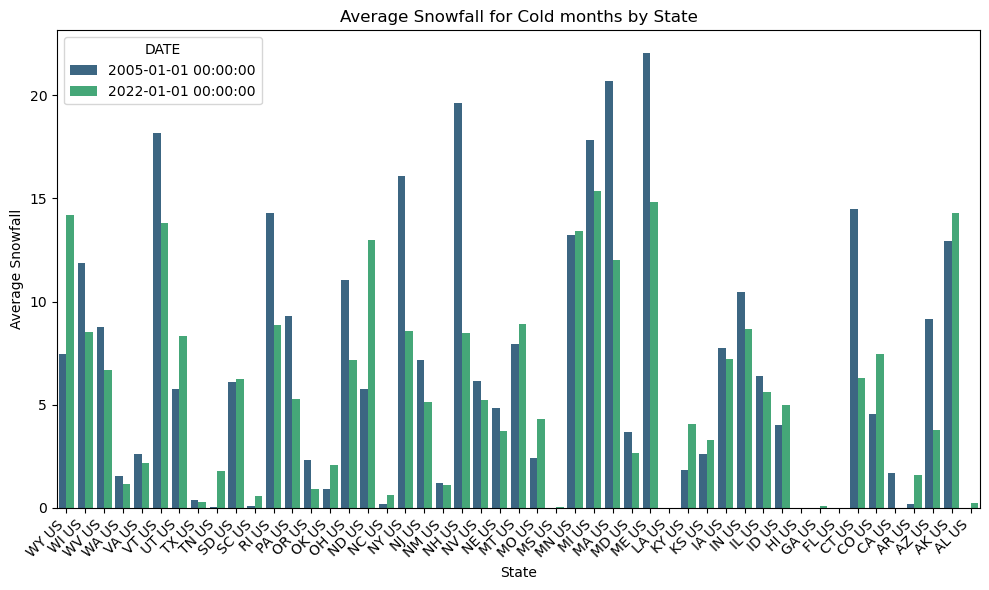

In [30]:
Weatherdf_filtered = Weather_df[Weather_df['DATE'].dt.year.isin([2005, 2022])]

plt.figure(figsize=(10, 6))
sns.barplot(data=Weatherdf_filtered, x='State', y='avg_snow_winter',hue='DATE', estimator='mean', palette='viridis')
plt.xlabel('State')
plt.ylabel('Average Snowfall')
plt.title('Average Snowfall for Cold months by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/Users/sairohithachalla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sairohithachalla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sairohithachalla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sairohithachalla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

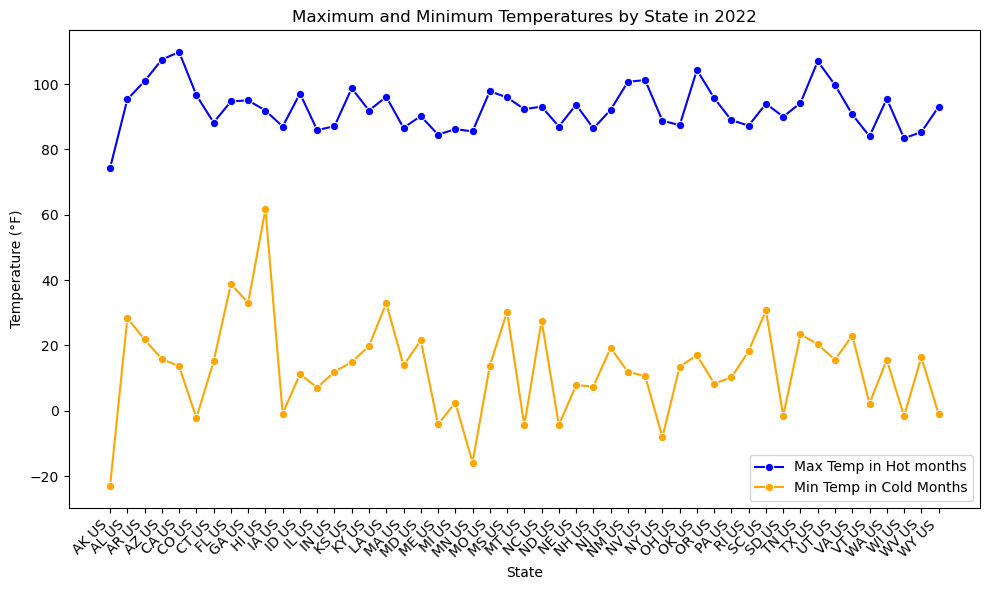

In [31]:

Weather_sorted = Weather_df.sort_values(by='State')

Weather_2022 = Weather_sorted[Weather_sorted['DATE'].dt.year == 2022]

# Plotting using Seaborn
plt.figure(figsize=(10, 6))

# Line plots
sns.lineplot(data=Weather_2022, x='State', y='max_temp_summer', marker='o', label='Max Temp in Hot months', color='blue')
sns.lineplot(data=Weather_2022, x='State', y='min_temp_winter', marker='o', label='Min Temp in Cold Months', color='orange')

plt.xlabel('State')
plt.ylabel('Temperature (°F)')
plt.title('Maximum and Minimum Temperatures by State in 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/0p/51n7nkmx0nn6q66l1_6v3r7m0000gn/T/ipykernel_6933/501065076.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(total_rainfall.index, total_rainfall.values,s=100, c='teal', cmap='viridis', marker='p')


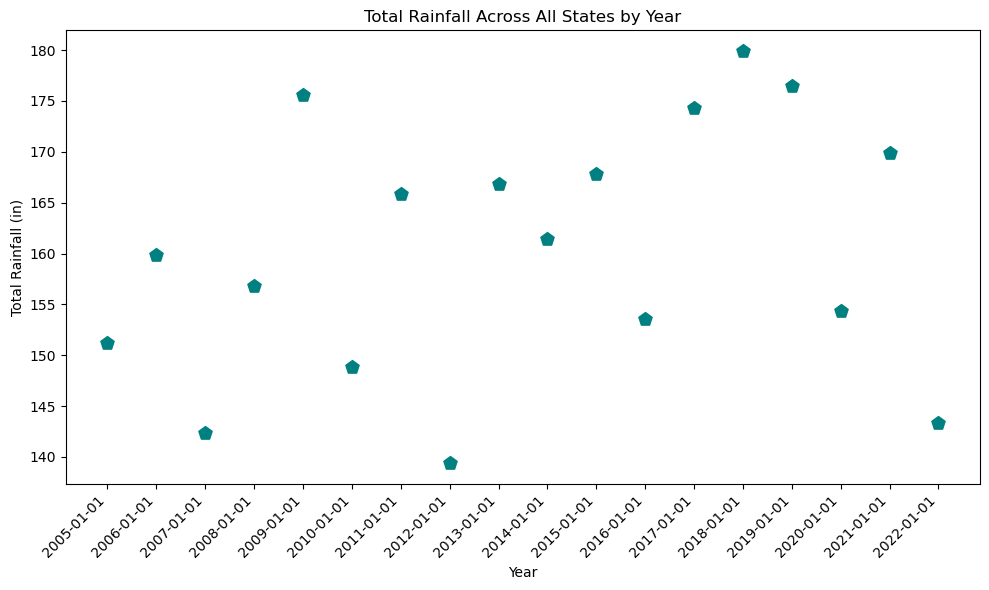

In [32]:


total_rainfall = Weather_sorted.groupby('DATE')['avg_prcp_summer'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(total_rainfall.index, total_rainfall.values,s=100, c='teal', cmap='viridis', marker='p')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (in)')
plt.title('Total Rainfall Across All States by Year')
plt.xticks(total_rainfall.index,rotation=45, ha='right')  # Set x-axis ticks to years

plt.tight_layout()
plt.show()

In [33]:
Weather_sorted['DATE'].unique()

<DatetimeArray>
['2013-01-01 00:00:00', '2020-01-01 00:00:00', '2019-01-01 00:00:00',
 '2018-01-01 00:00:00', '2017-01-01 00:00:00', '2016-01-01 00:00:00',
 '2015-01-01 00:00:00', '2014-01-01 00:00:00', '2022-01-01 00:00:00',
 '2021-01-01 00:00:00', '2011-01-01 00:00:00', '2010-01-01 00:00:00',
 '2009-01-01 00:00:00', '2008-01-01 00:00:00', '2007-01-01 00:00:00',
 '2006-01-01 00:00:00', '2005-01-01 00:00:00', '2012-01-01 00:00:00']
Length: 18, dtype: datetime64[ns]

In [34]:
#Creating a dataframe that doesn't have 2020 data
Weather_filtered = Weather_sorted[Weather_sorted['DATE'] != '2020-01-01 00:00:00']

In [35]:
#Sorting the data by State, Date and resetting its index
Weather_filtered = Weather_filtered.sort_values(by=['State', 'DATE']).reset_index(drop=True)

In [36]:
#Renaming the state column to further create a new column
Weather_filtered = Weather_filtered.rename(columns={'State': 'state_ab'})

In [37]:
#list of the states and abbreviations to map
state_abbr_to_name = {
    'AL US': 'Alabama', 'AK US': 'Alaska', 'AZ US': 'Arizona', 'AR US': 'Arkansas', 'CA US': 'California',
    'CO US': 'Colorado', 'CT US': 'Connecticut', 'DE US': 'Delaware', 'FL US': 'Florida', 'GA US': 'Georgia',
    'HI US': 'Hawaii', 'ID US': 'Idaho', 'IL US': 'Illinois', 'IN US': 'Indiana', 'IA US': 'Iowa',
    'KS US': 'Kansas', 'KY US': 'Kentucky', 'LA US': 'Louisiana', 'ME US': 'Maine', 'MD US': 'Maryland',
    'MA US': 'Massachusetts', 'MI US': 'Michigan', 'MN US': 'Minnesota', 'MS US': 'Mississippi', 'MO US': 'Missouri',
    'MT US': 'Montana', 'NE US': 'Nebraska', 'NV US': 'Nevada', 'NH US': 'New Hampshire', 'NJ US': 'New Jersey',
    'NM US': 'New Mexico', 'NY US': 'New York', 'NC US': 'North Carolina', 'ND US': 'North Dakota', 'OH US': 'Ohio',
    'OK US': 'Oklahoma', 'OR US': 'Oregon', 'PA US': 'Pennsylvania', 'RI US': 'Rhode Island', 'SC US': 'South Carolina',
    'SD US': 'South Dakota', 'TN US': 'Tennessee', 'TX US': 'Texas', 'UT US': 'Utah', 'VT US': 'Vermont',
    'VA US': 'Virginia', 'WA US': 'Washington', 'WV US': 'West Virginia', 'WI US': 'Wisconsin', 'WY US': 'Wyoming'
}

In [38]:
#Mapping the state names to the abbreviations
Weather_filtered['State'] = Weather_filtered['state_ab'].map(state_abbr_to_name)

In [39]:
Weather_filtered.head()

state_ab       DATE  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0    AK US 2005-01-01         6.230833             73.5            -22.7   
1    AK US 2006-01-01         7.095000             70.1            -29.7   
2    AK US 2007-01-01         6.613333             75.1            -25.8   
3    AK US 2008-01-01         8.601667             70.2            -23.0   
4    AK US 2009-01-01         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  avg_snow_winter  max_temp_summer  max_temp_winter  \
0         1.460000           12.910             73.5             45.8   
1         2.138571           14.034             70.1             43.6   
2         1.244286           14.130             75.1             44.1   
3         3.332857           15.978             70.2             42.8   
4         1.438571           19.254             78.6             44.1   

   min_temp_summer  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0             -3.8            -22.7        46.864286           18.518   
1             -9.8            -29.7        45.245714           13.616   
2              3.2            -25.8        46.288571           15.658   
3             -0.9            -23.0        43.210000           14.160   
4             -4.6            -24.4        45.860000           14.342   

   avg_prcp_summer  avg_prcp_winter   State  
0         3.174286            3.260  Alaska  
1         3.522857            1.878  Alaska  
2         2.912857            2.246  Alaska  
3         3.408571            2.274  Alaska  
4         2.674286            2.870  Alaska

In [40]:
# Weather_filtered.to_csv('weatherf.csv', index=False)

In [41]:
import pandas as pd
import os

In [44]:
#defining a function to read the excel files and return them as dataframes
def read_xls_files(directory):
    dataframes = [] #initiating an empty list to store the dataframes in
    for filename in os.listdir(directory):
        if filename.endswith(".xls"):
            filepath = os.path.join(directory, filename)
            df = pd.read_excel(filepath, sheet_name='Sheet1')  #reading the sheet1 into a dataframe
            dataframes.append(df)  #appending the dataframes to the list
    return dataframes

# Provide the directory containing the .xls files
directory = '/Users/sairohithachalla/Downloads/Data Mining/data/migration'
dataframesmig = read_xls_files(directory) #getting the dataframes for all the files

In [45]:
dataframesmig[11]

State  Total Pop  In-state Pop  Percentage    Top1  \
0                 Alabama    5008263       4869000    0.027807   23155   
1                  Alaska     719005        682442    0.050852    4215   
2                 Arizona    7238448       6955719    0.039059   74157   
3                Arkansas    2999135       2912760    0.028800   17105   
4              California   38326066      37850263    0.012415   42279   
5                Colorado    5746751       5516875    0.040001   33213   
6             Connecticut    3563248       3417933    0.040782   50670   
7                Delaware    1003579        957417    0.045997   11392   
8   District of Columbia      648214        583708    0.099513   13093   
9                 Florida   21776870      21037901    0.033934   91201   
10                Georgia   10730534      10402739    0.030548   51380   
11                 Hawaii    1413908       1357699    0.039754   10562   
12                  Idaho    1910233       1822284    0.046041   26887   
13               Illinois   12381294      12152986    0.018440   20573   
14                Indiana    6728079       6578748    0.022195   31015   
15                   Iowa    3155751       3083520    0.022889   16504   
16                 Kansas    2895039       2800831    0.032541   20905   
17               Kentucky    4445854       4332657    0.025461   12947   
18              Louisiana    4516994       4441664    0.016677   17663   
19                  Maine    1367670       1326052    0.030430    8663   
20               Maryland    6047083       5907299    0.023116   19478   
21          Massachusetts    6842997       6671920    0.025000   21186   
22               Michigan    9894383       9736428    0.015964   17557   
23              Minnesota    5629070       5512054    0.020788   18702   
24            Mississippi    2893381       2823433    0.024175   11406   
25               Missouri    6093385       5930131    0.026792   22333   
26                Montana    1108756       1060591    0.043441    5225   
27               Nebraska    1932947       1883788    0.025432    6422   
28                 Nevada    3130707       3003301    0.040696   48836   
29          New Hampshire    1379875       1330093    0.036077   23605   
30             New Jersey    9094952       8919929    0.019244   75103   
31             New Mexico    2082987       2010892    0.034611   16986   
32               New York   19336142      19034681    0.015591   38771   
33         North Carolina   10530187      10188605    0.032438   34920   
34           North Dakota     765465        730929    0.045118   13047   
35                   Ohio   11580524      11379715    0.017340   16831   
36               Oklahoma    3955897       3838109    0.029775   26440   
37                 Oregon    4183262       4054903    0.030684   36429   
38           Pennsylvania   12788362      12525662    0.020542   44807   
39           Rhode Island    1075379       1035068    0.037485   12606   
40         South Carolina    5206113       4986406    0.042202   36324   
41           South Dakota     894946        863646    0.034974    6934   
42              Tennessee    6945242       6719273    0.032536   25318   
43                  Texas   29434396      28766058    0.022706  102442   
44                   Utah    3317718       3226377    0.027531   18669   
45                Vermont     637970        611819    0.040991    4760   
46               Virginia    8528129       8261159    0.031305   28470   
47             Washington    7652554       7404199    0.032454   49968   
48          West Virginia    1755773       1712280    0.024771    8279   
49              Wisconsin    5811241       5690807    0.020724   27369   
50                Wyoming     574003        545055    0.050432    5076   

   Reference      Top1 State  Year  
0      $AF$1         Georgia  2022  
1      $DC$1            Utah  2022  
2       $S$1      California  2022  
3      $DA$1           

In [46]:
#Concatenating all the dataframes in the obtained list
Migration_df = pd.concat(dataframesmig, ignore_index=True)

In [47]:
Migration_df.head()

State  Total Pop  In-state Pop  Percentage   Top1 Reference  \
0     Alabama    4716343       4607620    0.023052  21644     $AF$1   
1      Alaska     697235        660909    0.052100   4123     $DA$1   
2     Arizona    6293718       6070993    0.035388  47164      $S$1   
3    Arkansas    2879930       2800803    0.027475  13707     $DA$1   
4  California   36648257      36203508    0.012136  36582     $DA$1   

   Top1 State  Year  
0     Georgia  2010  
1       Texas  2010  
2  California  2010  
3       Texas  2010  
4       Texas  2010

In [48]:
#Dropping the unnecessary column
Migration_df.drop(columns=['Reference'], inplace=True)

In [49]:
#Converting the percentage column to show values in % 
Migration_df['Percentage'] = Migration_df['Percentage'] * 100

In [50]:
Migration_df[0:20]

State  Total Pop  In-state Pop  Percentage   Top1  \
0                 Alabama    4716343       4607620    2.305239  21644   
1                  Alaska     697235        660909    5.210008   4123   
2                 Arizona    6293718       6070993    3.538846  47164   
3                Arkansas    2879930       2800803    2.747532  13707   
4              California   36648257      36203508    1.213561  36582   
5                Colorado    4953818       4767452    3.762068  26089   
6             Connecticut    3520979       3443646    2.196349  20727   
7                Delaware     885400        854641    3.474023   7318   
8   District of Columbia      589686        538442    8.690049  13503   
9                 Florida   18496427      18013538    2.610715  55011   
10                Georgia    9543416       9293957    2.613938  49901   
11                 Hawaii    1328468       1274887    4.033292  12677   
12                  Idaho    1544766       1489128    3.601711  10876   
13               Illinois   12618336      12414377    1.616370  21918   
14                Indiana    6391454       6264101    1.992551  27950   
15                   Iowa    3001417       2928860    2.417425  17016   
16                 Kansas    2808621       2713562    3.384544  23384   
17               Kentucky    4276589       4158146    2.769567  15598   
18              Louisiana    4471570       4373681    2.189142  26134   
19                  Maine    1311273       1283515    2.116874   4058   

       Top1 State  Year  
0         Georgia  2010  
1           Texas  2010  
2      California  2010  
3           Texas  2010  
4           Texas  2010  
5      California  2010  
6        New York  2010  
7    Pennsylvania  2010  
8        Maryland  2010  
9        New York  2010  
10        Florida  2010  
11     California  2010  
12     Washington  2010  
13        Indiana  2010  
14       Illinois  2010  
15       Illinois  2010  
16       Missouri  2010  
17           Ohio  2010  
18          Texas  2010  
19  New Hampshire  2010

In [51]:
#Renaming the column for merging with weather data
Migration_df = Migration_df.rename(columns={'Year': 'DATE'})

In [52]:
#Converting the datatype
Migration_df['DATE'] = pd.to_datetime(Migration_df['DATE'], format='%Y')

In [53]:
#Sorting the dataframe by state, date and resetting the index
Migration_sorted = Migration_df.sort_values(by=['State', 'DATE']).reset_index(drop=True)

In [54]:
#Getting the unique values of State, to further drop the states' which aren't in weather
Migration_sorted['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia ',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [55]:
Migration_sorted.dtypes

State                   object
Total Pop                int64
In-state Pop             int64
Percentage             float64
Top1                     int64
Top1 State              object
DATE            datetime64[ns]
dtype: object

In [56]:
#States that'll be dropped to help merge dataframes
states_to_drop = ["Puerto Rico", "Delaware", "District of Columbia "]

In [57]:
#Dropping the above list of states
Migration_filtered = Migration_sorted[~Migration_sorted['State'].isin(states_to_drop)]

In [58]:
Migration_filtered['State'].nunique()

49

In [59]:


#Checking missing values in Migration data
missing_values_m = Migration_filtered.isna().sum()
print(missing_values_m)

#Checking for rows with blanks for total population
blank_rows_p = Migration_filtered[Migration_filtered['Total Pop'] == 0]
print(blank_rows_p)

State           0
Total Pop       0
In-state Pop    0
Percentage      0
Top1            0
Top1 State      0
DATE            0
dtype: int64
Empty DataFrame
Columns: [State, Total Pop, In-state Pop, Percentage, Top1, Top1 State, DATE]
Index: []


In [60]:
#fill avg_snow missing values to 0

Weatherdf['avg_snow'] = Weatherdf['avg_snow'].fillna(0)

In [61]:
#Merging 2 dataframes on State and DATE columns
merged_df = pd.merge(Weather_filtered, Migration_filtered, on=['State', 'DATE'], how='inner')

In [62]:
#make all column names lowercase
merged_df.columns = [column.lower() for column in merged_df.columns]


In [63]:
merged_df.head()

state_ab       date  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0    AK US 2005-01-01         6.230833             73.5            -22.7   
1    AK US 2006-01-01         7.095000             70.1            -29.7   
2    AK US 2007-01-01         6.613333             75.1            -25.8   
3    AK US 2008-01-01         8.601667             70.2            -23.0   
4    AK US 2009-01-01         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  ...  avg_temp_summer  avg_temp_winter  avg_prcp_summer  \
0         1.460000  ...        46.864286           18.518         3.174286   
1         2.138571  ...        45.245714           13.616         3.522857   
2         1.244286  ...        46.288571           15.658         2.912857   
3         3.332857  ...        43.210000           14.160         3.408571   
4         1.438571  ...        45.860000           14.342         2.674286   

   avg_prcp_winter   state  total pop  in-state pop  percentage  top1  \
0            3.260  Alaska     115525         84150   27.158624  5711   
1            1.878  Alaska     139758        102086   26.955165  4850   
2            2.246  Alaska     135095         98512   27.079463  3985   
3            2.274  Alaska     150412        110205   26.731245  4951   
4            2.870  Alaska     147525        107051   27.435350  3780   

   top1 state  
0  Washington  
1  Washington  
2  California  
3  California  
4  California  

[5 rows x 25 columns]

In [64]:
#move state column to the beginning
cols = ['state'] + [col for col in merged_df if col != 'state']
merged_df = merged_df[cols]
merged_df.head()

state state_ab       date  yearly_avg_snow  yearly_max_temp  \
0  Alaska    AK US 2005-01-01         6.230833             73.5   
1  Alaska    AK US 2006-01-01         7.095000             70.1   
2  Alaska    AK US 2007-01-01         6.613333             75.1   
3  Alaska    AK US 2008-01-01         8.601667             70.2   
4  Alaska    AK US 2009-01-01         8.861667             78.6   

   yearly_min_temp  yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  \
0            -22.7        35.053333         3.210000             1.59   
1            -29.7        32.066667         2.837500             0.99   
2            -25.8        33.525833         2.635000             0.76   
3            -23.0        31.105833         2.935833             2.04   
4            -24.4        32.727500         2.755833             1.28   

   yearly_max_prcp  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0             6.21  ...            -22.7        46.864286           18.518   
1             5.69  ...            -29.7        45.245714           13.616   
2             5.82  ...            -25.8        46.288571           15.658   
3             5.32  ...            -23.0        43.210000           14.160   
4             4.56  ...            -24.4        45.860000           14.342   

   avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
0         3.174286            3.260     115525         84150   27.158624   
1         3.522857            1.878     139758        102086   26.955165   
2         2.912857            2.246     135095         98512   27.079463   
3         3.408571            2.274     150412        110205   26.731245   
4         2.674286            2.870     147525        107051   27.435350   

   top1  top1 state  
0  5711  Washington  
1  4850  Washington  
2  3985  California  
3  4951  California  
4  3780  California  

[5 rows x 25 columns]

In [65]:
#drop state_ab column
#move state column to the beginning
merged_df.drop('state_ab', axis = 1, inplace = True)

In [66]:
merged_df.head()

state       date  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0  Alaska 2005-01-01         6.230833             73.5            -22.7   
1  Alaska 2006-01-01         7.095000             70.1            -29.7   
2  Alaska 2007-01-01         6.613333             75.1            -25.8   
3  Alaska 2008-01-01         8.601667             70.2            -23.0   
4  Alaska 2009-01-01         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0         1.460000  ...            -22.7        46.864286           18.518   
1         2.138571  ...            -29.7        45.245714           13.616   
2         1.244286  ...            -25.8        46.288571           15.658   
3         3.332857  ...            -23.0        43.210000           14.160   
4         1.438571  ...            -24.4        45.860000           14.342   

   avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
0         3.174286            3.260     115525         84150   27.158624   
1         3.522857            1.878     139758        102086   26.955165   
2         2.912857            2.246     135095         98512   27.079463   
3         3.408571            2.274     150412        110205   26.731245   
4         2.674286            2.870     147525        107051   27.435350   

   top1  top1 state  
0  5711  Washington  
1  4850  Washington  
2  3985  California  
3  4951  California  
4  3780  California  

[5 rows x 24 columns]

In [67]:
#convert date into just years

merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')

# Extract the year component and assign it to the date column
merged_df['year'] = merged_df['date'].dt.year.astype(str)

merged_df.head()


state       date  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0  Alaska 2005-01-01         6.230833             73.5            -22.7   
1  Alaska 2006-01-01         7.095000             70.1            -29.7   
2  Alaska 2007-01-01         6.613333             75.1            -25.8   
3  Alaska 2008-01-01         8.601667             70.2            -23.0   
4  Alaska 2009-01-01         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  ...  avg_temp_summer  avg_temp_winter  avg_prcp_summer  \
0         1.460000  ...        46.864286           18.518         3.174286   
1         2.138571  ...        45.245714           13.616         3.522857   
2         1.244286  ...        46.288571           15.658         2.912857   
3         3.332857  ...        43.210000           14.160         3.408571   
4         1.438571  ...        45.860000           14.342         2.674286   

   avg_prcp_winter  total pop  in-state pop  percentage  top1  top1 state  \
0            3.260     115525         84150   27.158624  5711  Washington   
1            1.878     139758        102086   26.955165  4850  Washington   
2            2.246     135095         98512   27.079463  3985  California   
3            2.274     150412        110205   26.731245  4951  California   
4            2.870     147525        107051   27.435350  3780  California   

   year  
0  2005  
1  2006  
2  2007  
3  2008  
4  2009  

[5 rows x 25 columns]

In [68]:
#move year column to second column
cols = ['state', 'year'] + [col for col in merged_df.columns if col not in ['state', 'year']]
merged_df = merged_df[cols]

#drop date column
merged_df.drop('date', axis = 1, inplace = True)

In [69]:
merged_df.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0  Alaska  2005         6.230833             73.5            -22.7   
1  Alaska  2006         7.095000             70.1            -29.7   
2  Alaska  2007         6.613333             75.1            -25.8   
3  Alaska  2008         8.601667             70.2            -23.0   
4  Alaska  2009         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0         1.460000  ...            -22.7        46.864286           18.518   
1         2.138571  ...            -29.7        45.245714           13.616   
2         1.244286  ...            -25.8        46.288571           15.658   
3         3.332857  ...            -23.0        43.210000           14.160   
4         1.438571  ...            -24.4        45.860000           14.342   

   avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
0         3.174286            3.260     115525         84150   27.158624   
1         3.522857            1.878     139758        102086   26.955165   
2         2.912857            2.246     135095         98512   27.079463   
3         3.408571            2.274     150412        110205   26.731245   
4         2.674286            2.870     147525        107051   27.435350   

   top1  top1 state  
0  5711  Washington  
1  4850  Washington  
2  3985  California  
3  4951  California  
4  3780  California  

[5 rows x 24 columns]

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            833 non-null    object 
 1   year             833 non-null    object 
 2   yearly_avg_snow  817 non-null    float64
 3   yearly_max_temp  833 non-null    float64
 4   yearly_min_temp  833 non-null    float64
 5   yearly_avg_temp  833 non-null    float64
 6   yearly_avg_prcp  833 non-null    float64
 7   yearly_min_prcp  833 non-null    float64
 8   yearly_max_prcp  833 non-null    float64
 9   avg_snow_summer  815 non-null    float64
 10  avg_snow_winter  813 non-null    float64
 11  max_temp_summer  833 non-null    float64
 12  max_temp_winter  833 non-null    float64
 13  min_temp_summer  833 non-null    float64
 14  min_temp_winter  833 non-null    float64
 15  avg_temp_summer  833 non-null    float64
 16  avg_temp_winter  833 non-null    float64
 17  avg_prcp_summer 

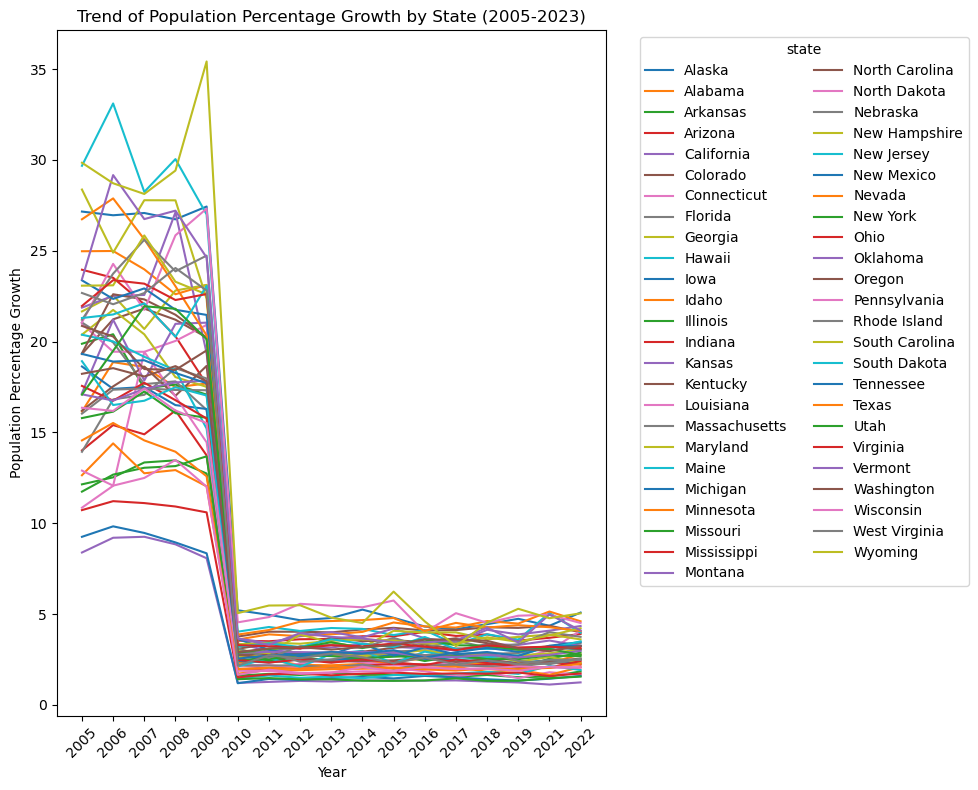

In [71]:
#plot states percentage growth over the years

plt.figure(figsize=(10, 8))

for state in merged_df['state'].unique():
    state_data = merged_df[merged_df['state'] == state]
    plt.plot(state_data['year'], state_data['percentage'], label=state)

plt.title('Trend of Population Percentage Growth by State (2005-2023)')
plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.legend(title='state', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)  # Adjust legend placement to avoid overlap
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()  # Show the plot

This shows that there was a huge drop in population growth between 2005 and 2009 and 2010-2022

In [72]:
#Therefore we will split the data to look at those specifica year groups. 

#split data between 2005-2009
filtered_years_df_0509 = merged_df[merged_df['year'].between('2005', '2009')]

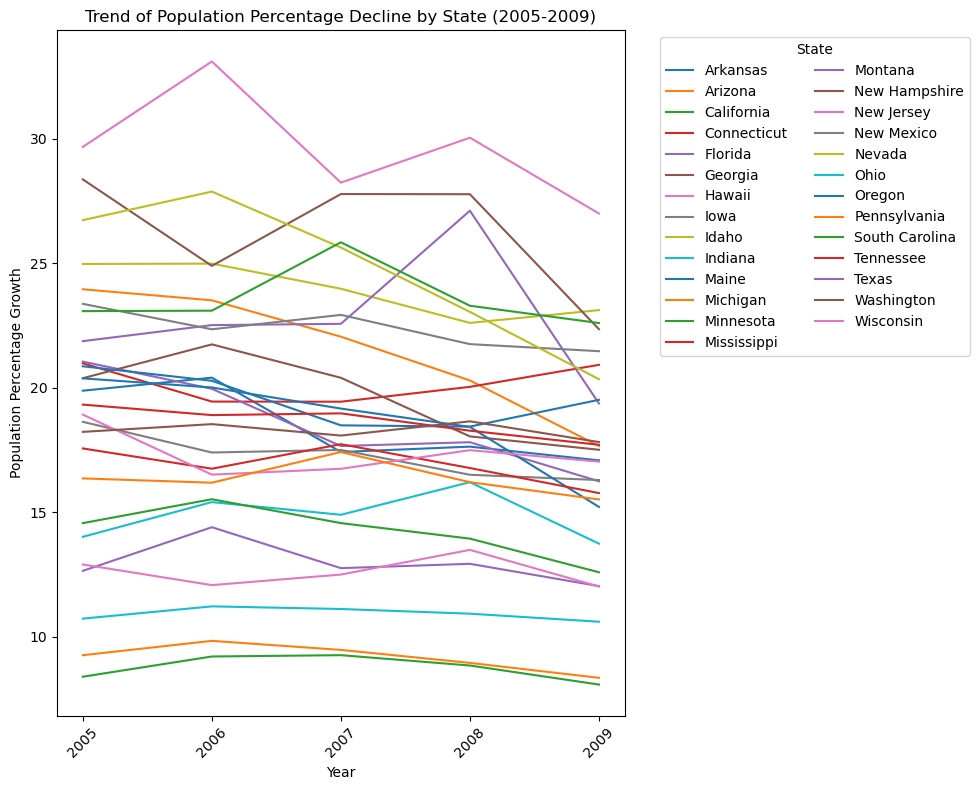

In [73]:
#focus in on states that had declining growth 
plt.figure(figsize=(10, 8))

declining_states = []

# Loop over each unique state in the filtered DataFrame
for state in filtered_years_df_0509['state'].unique():
    # Filter data for the current state
    state_data = filtered_years_df_0509[filtered_years_df_0509['state'] == state]
    # Check if there's a decline from the first to the last year in the subset
    if state_data['percentage'].values[-1] < state_data['percentage'].values[0]:
        declining_states.append(state)
        plt.plot(state_data['year'], state_data['percentage'], label=state)

plt.title('Trend of Population Percentage Decline by State (2005-2009)')
plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here are all the states that had declining growth from 2005 and 2009. 

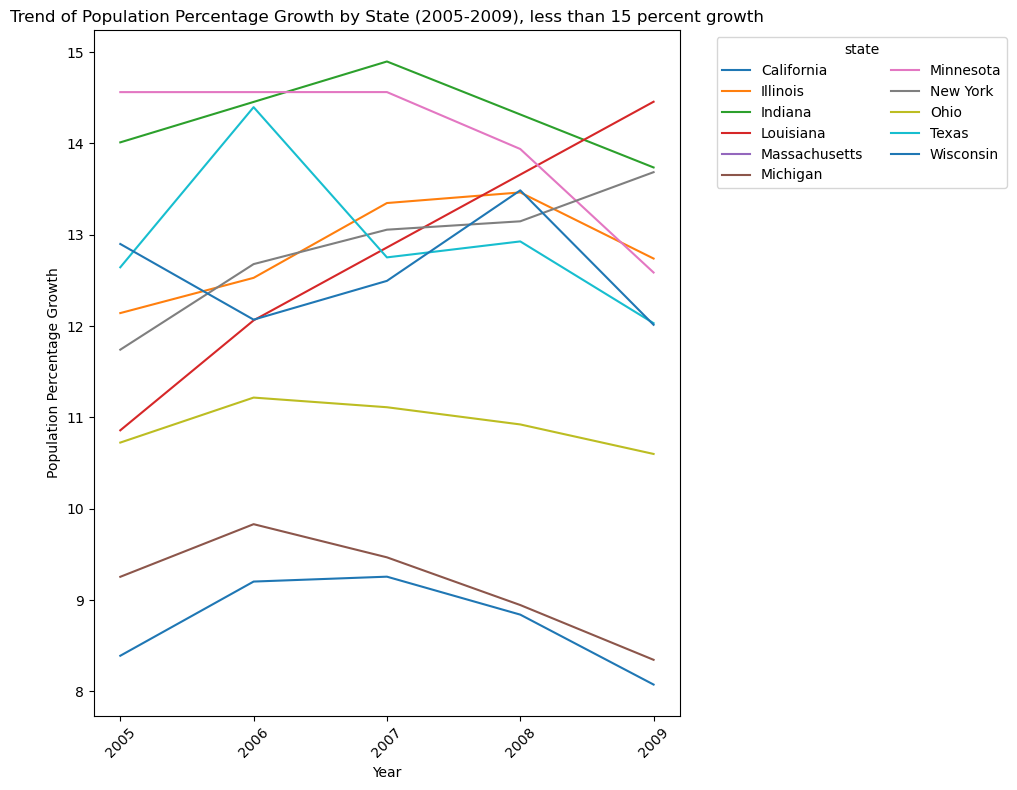

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [74]:
#focus in on states that had growth that were less than 15% growth. 

filtered_years_prct_less_than_15 = filtered_years_df_0509[(filtered_years_df_0509['percentage'] < 15)]


plt.figure(figsize=(10, 8))

for state in filtered_years_prct_less_than_15['state'].unique():
    state_data = filtered_years_prct_less_than_15[filtered_years_prct_less_than_15['state'] == state]
    plt.plot(state_data['year'], state_data['percentage'], label=state)

plt.title('Trend of Population Percentage Growth by State (2005-2009), less than 15 percent growth')
plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.legend(title='state', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)  # Adjust legend placement to avoid overlap
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()  # Show the plot
plt.figure(figsize=(10, 8))



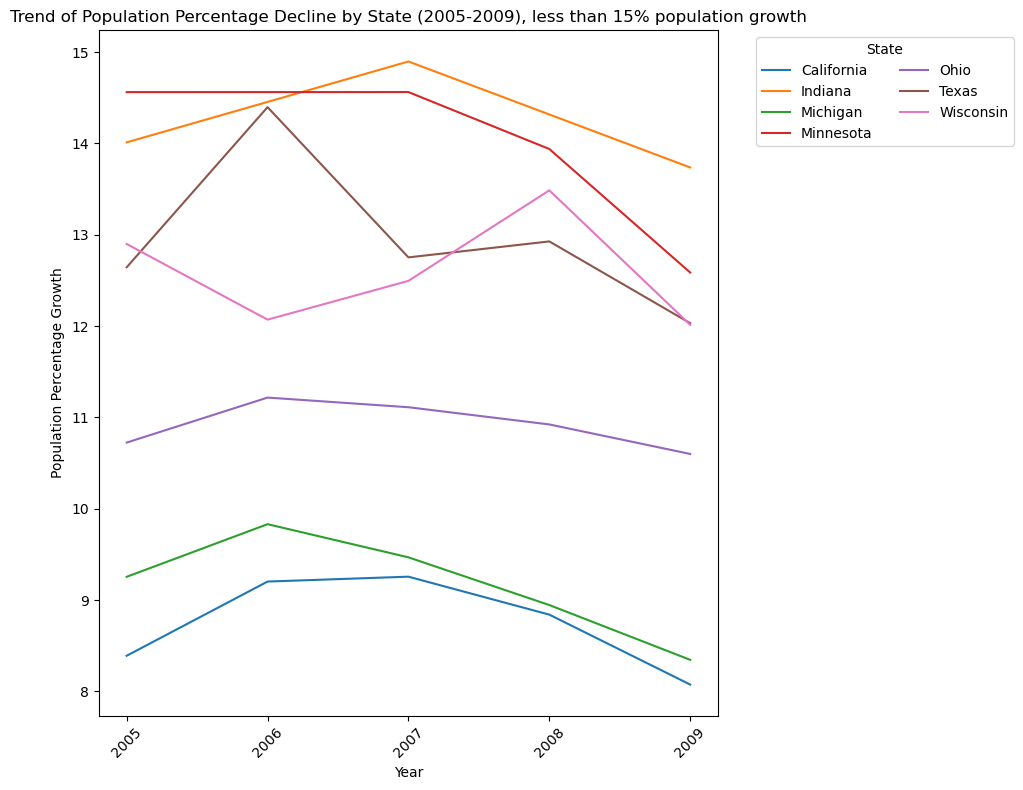

In [75]:
#focus in on states that had declining growth that were less than 15% growth. 
plt.figure(figsize=(10, 8))

declining_states_15 = []
# Loop over each unique state in the filtered DataFrame
for state in filtered_years_prct_less_than_15['state'].unique():
    # Filter data for the current state
    state_data = filtered_years_prct_less_than_15[filtered_years_prct_less_than_15['state'] == state]
    # Check if there's a decline from the first to the last year in the subset
    if state_data['percentage'].values[-1] < state_data['percentage'].values[0]:
        declining_states_15.append(state)
        plt.plot(state_data['year'], state_data['percentage'], label=state)

plt.title('Trend of Population Percentage Decline by State (2005-2009), less than 15% population growth')
plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

California, Ohio, Indiana, Texas, Michigan, Wisconsin and Minnesota had decreasing population growth between 2005 and 2009. 

In [76]:
declining_migration_df_15 = filtered_years_df_0509[filtered_years_df_0509['state'].isin(declining_states_15)].copy()
declining_migration_df_15.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
68  California  2005         0.697500            114.3             15.7   
69  California  2006         0.385000            112.8             16.3   
70  California  2007         0.023333            110.6             11.3   
71  California  2008         0.145833            109.7             13.1   
72  California  2009         0.041667            111.8             14.3   

    yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
68        61.175833         1.854167             0.01             5.90   
69        61.183333         1.321667             0.03             4.25   
70        61.233333         0.771667             0.02             3.12   
71        61.374167         1.027500             0.00             5.85   
72        61.285833         1.060000             0.02             4.14   

    avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
68              0.0  ...             15.7        67.357143           52.522   
69              0.0  ...             16.3        68.648571           50.732   
70              0.0  ...             11.3        68.201429           51.478   
71              0.0  ...             13.1        68.792857           50.988   
72              0.0  ...             14.3        68.554286           51.110   

    avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
68         0.557143            3.670    5353798       4904586    8.390529   
69         0.572857            2.370    5698358       5173950    9.202791   
70         0.378571            1.322    5311592       4819935    9.256302   
71         0.112857            2.308    5303579       4834704    8.840728   
72         0.520000            1.816    5698601       5238440    8.074982   

     top1  top1 state  
68  36030       Texas  
69  49027       Texas  
70  36391       Texas  
71  42142       Texas  
72  35104       Texas  

[5 rows x 24 columns]

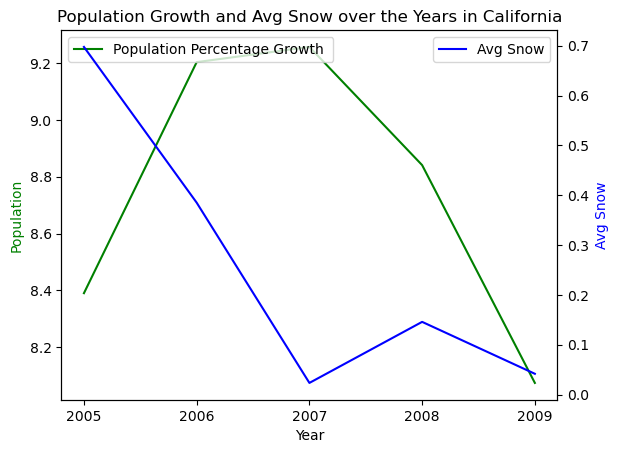

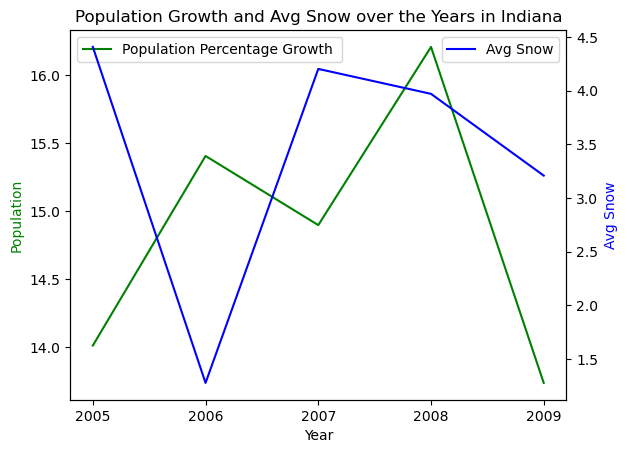

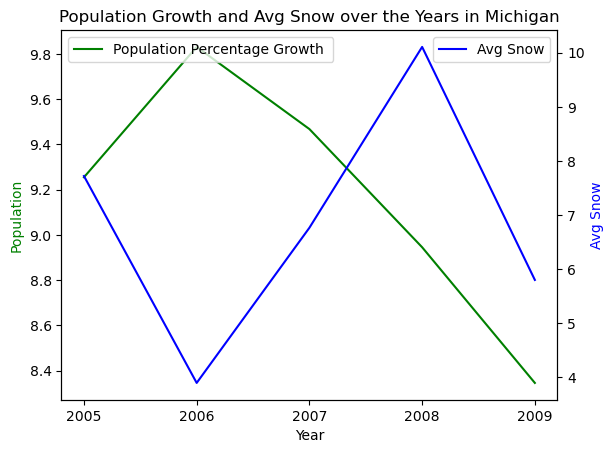

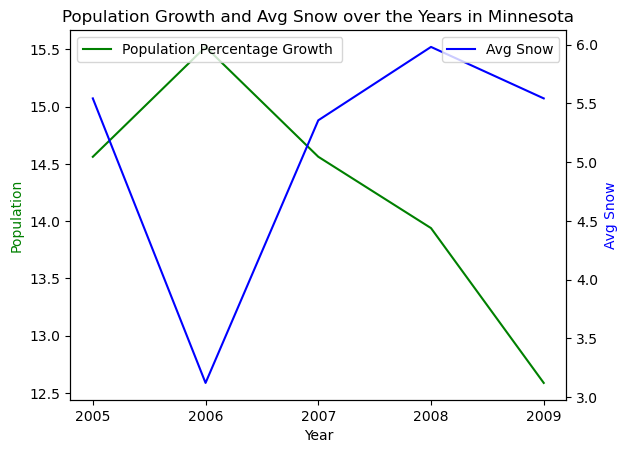

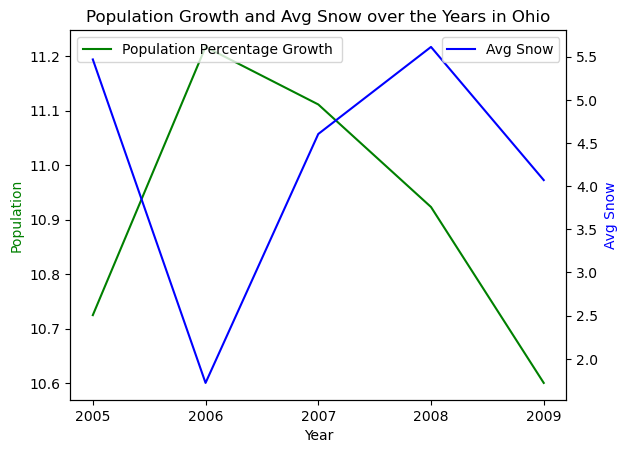

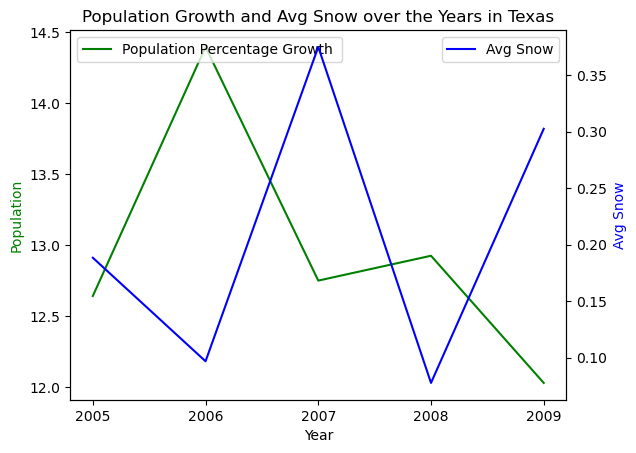

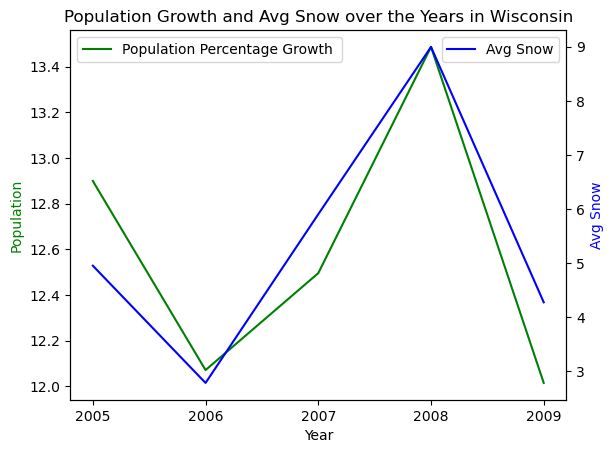

In [77]:
for state in declining_migration_df_15['state'].unique():
    fig, ax1 = plt.subplots()

    # Filter the DataFrame for the current state
    state_data = declining_migration_df_15[declining_migration_df_15['state'] == state]

    # Create a twin y-axis to plot avg_snow on a separate axis
    ax2 = ax1.twinx()
    
    # Plot population
    ax1.plot(state_data['year'], state_data['percentage'], 'g-', label='Population Percentage Growth ')
    
    # Plot avg_snow
    ax2.plot(state_data['year'], state_data['yearly_avg_snow'], 'b-', label='Avg Snow')
    
    # Setting the labels
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Population', color='g')
    ax2.set_ylabel('Avg Snow', color='b')
    
    # Title
    plt.title(f'Population Growth and Avg Snow over the Years in {state}')
    
    # Show legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()

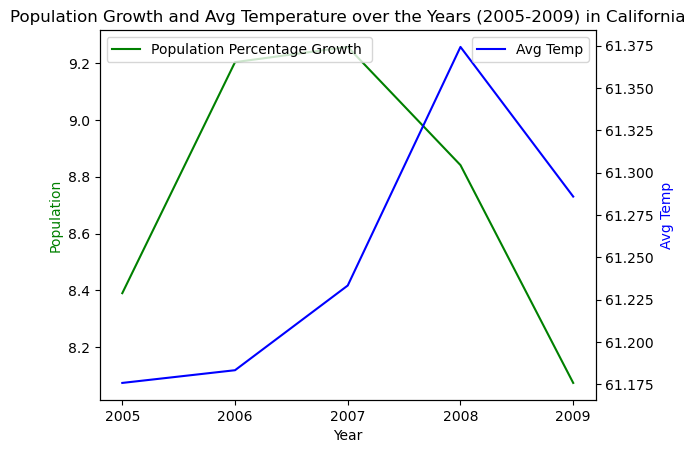

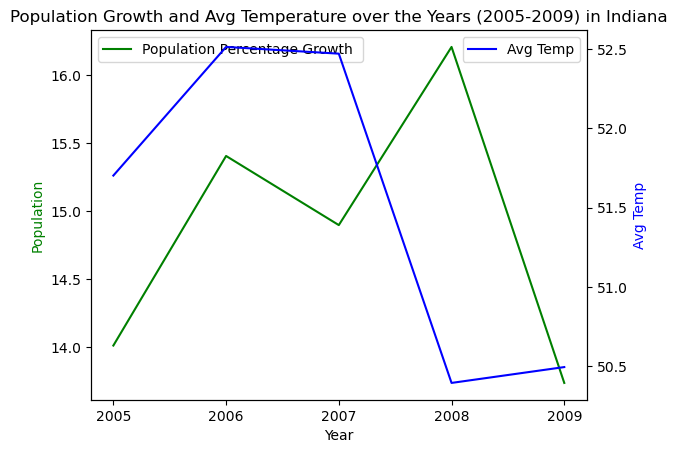

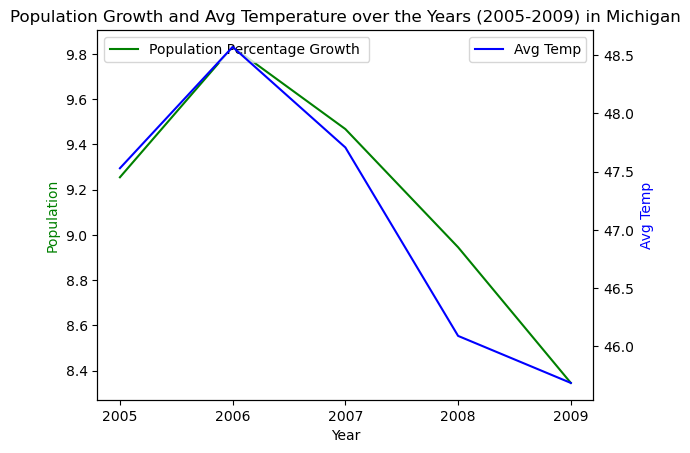

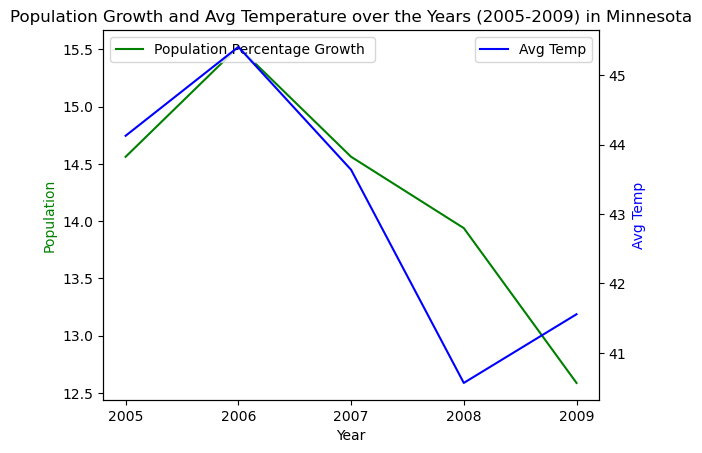

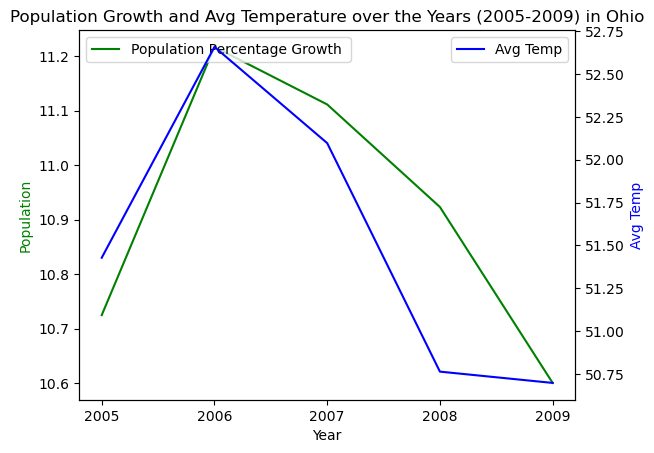

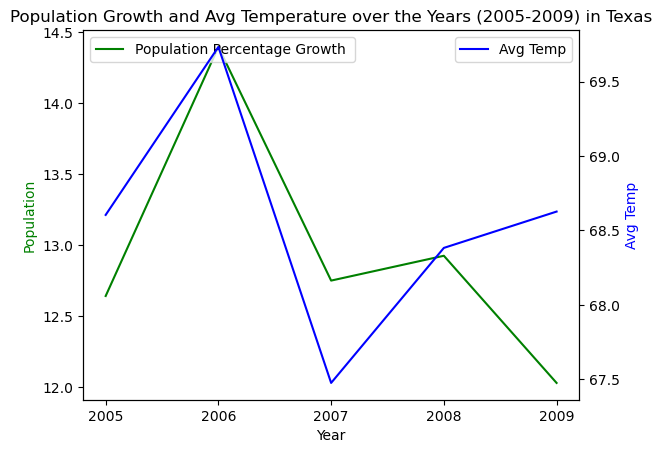

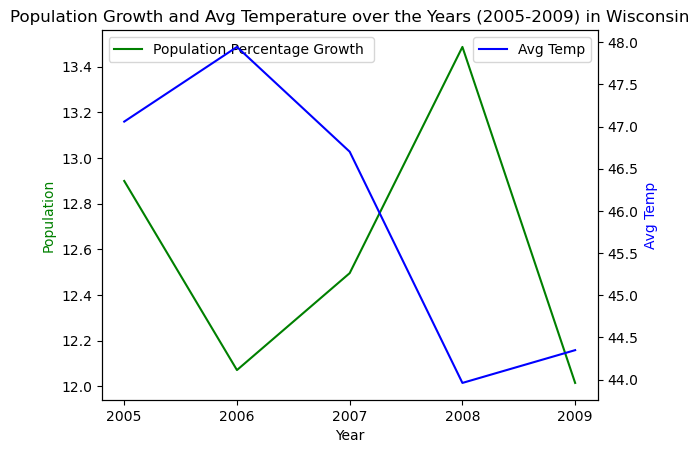

In [78]:
for state in declining_migration_df_15['state'].unique():
    fig, ax1 = plt.subplots()

    # Filter the DataFrame for the current state
    state_data = declining_migration_df_15[declining_migration_df_15['state'] == state]

    # Create a twin y-axis to plot avg_snow on a separate axis
    ax2 = ax1.twinx()
    
    # Plot population
    ax1.plot(state_data['year'], state_data['percentage'], 'g-', label='Population Percentage Growth ')
    
    # Plot avg_snow
    ax2.plot(state_data['year'], state_data['yearly_avg_temp'], 'b-', label='Avg Temp')
    
    # Setting the labels
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Population', color='g')
    ax2.set_ylabel('Avg Temp', color='b')
    
    # Title
    plt.title(f'Population Growth and Avg Temperature over the Years (2005-2009) in {state}')
    
    # Show legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.show()

In [79]:
merged_df.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0  Alaska  2005         6.230833             73.5            -22.7   
1  Alaska  2006         7.095000             70.1            -29.7   
2  Alaska  2007         6.613333             75.1            -25.8   
3  Alaska  2008         8.601667             70.2            -23.0   
4  Alaska  2009         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0         1.460000  ...            -22.7        46.864286           18.518   
1         2.138571  ...            -29.7        45.245714           13.616   
2         1.244286  ...            -25.8        46.288571           15.658   
3         3.332857  ...            -23.0        43.210000           14.160   
4         1.438571  ...            -24.4        45.860000           14.342   

   avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
0         3.174286            3.260     115525         84150   27.158624   
1         3.522857            1.878     139758        102086   26.955165   
2         2.912857            2.246     135095         98512   27.079463   
3         3.408571            2.274     150412        110205   26.731245   
4         2.674286            2.870     147525        107051   27.435350   

   top1  top1 state  
0  5711  Washington  
1  4850  Washington  
2  3985  California  
3  4951  California  
4  3780  California  

[5 rows x 24 columns]

Text(0.5, 1.0, 'Average temperature and snow')

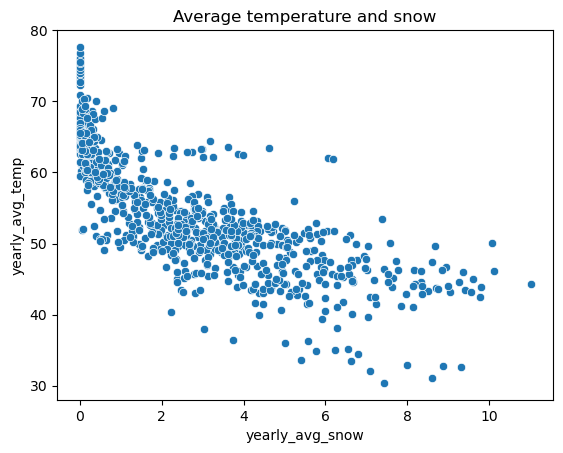

In [172]:
sns.scatterplot(x=merged_df.yearly_avg_snow,y=merged_df.yearly_avg_temp)
plt.title('Average temperature and snow')


<Axes: xlabel='yearly_avg_prcp', ylabel='yearly_avg_temp'>

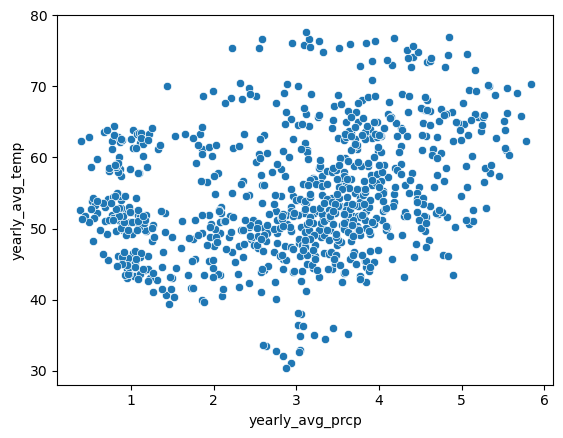

In [81]:
sns.scatterplot(x=merged_df.yearly_avg_prcp,y=merged_df.yearly_avg_temp)

Text(0.5, 1.0, 'Minimum temperature and Average snow')

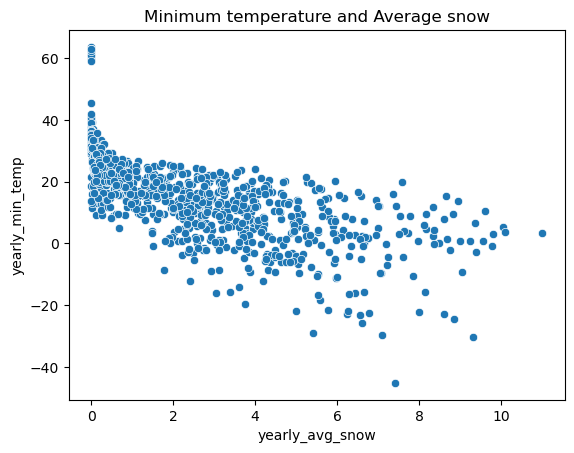

In [173]:
sns.scatterplot(x=merged_df.yearly_avg_snow,y=merged_df.yearly_min_temp)
plt.title('Minimum temperature and Average snow')

<Axes: xlabel='yearly_avg_snow', ylabel='yearly_avg_prcp'>

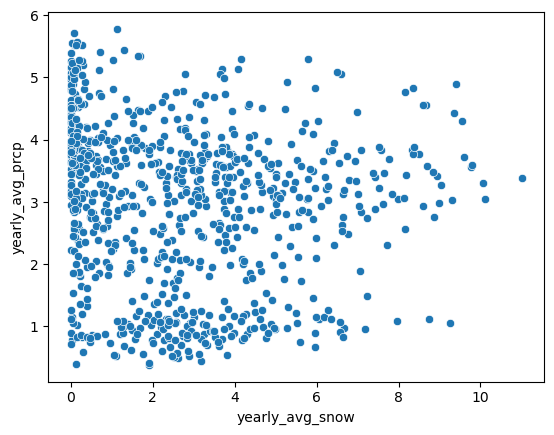

In [83]:
sns.scatterplot(x=merged_df.yearly_avg_snow,y=merged_df.yearly_avg_prcp)

In [84]:
#average temprature in the US over the years
#average precipiation in the US over the years
#average snowfall in the US over the years
#BEGINNING OF THE PAPER


In [85]:
filtered_years_df_10_23 = merged_df[merged_df['year'].between('2010', '2023')]

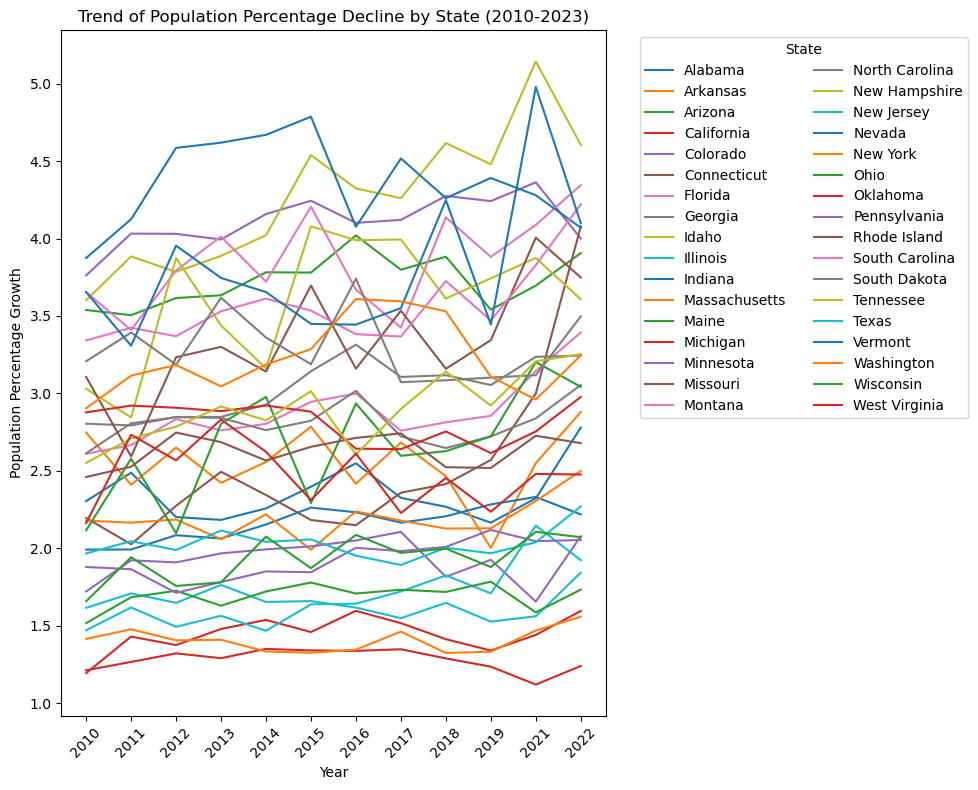

In [86]:
#focus in on states that had declining growth 
plt.figure(figsize=(10, 8))

inclining_states = []

# Loop over each unique state in the filtered DataFrame
for state in filtered_years_df_10_23['state'].unique():
    # Filter data for the current state
    state_data = filtered_years_df_10_23[filtered_years_df_10_23['state'] == state]
    # Check if there's a incline from the first to the last year in the subset
    if state_data['percentage'].values[-1] > state_data['percentage'].values[0]:
        inclining_states.append(state)
        plt.plot(state_data['year'], state_data['percentage'], label=state)

plt.title('Trend of Population Percentage Decline by State (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


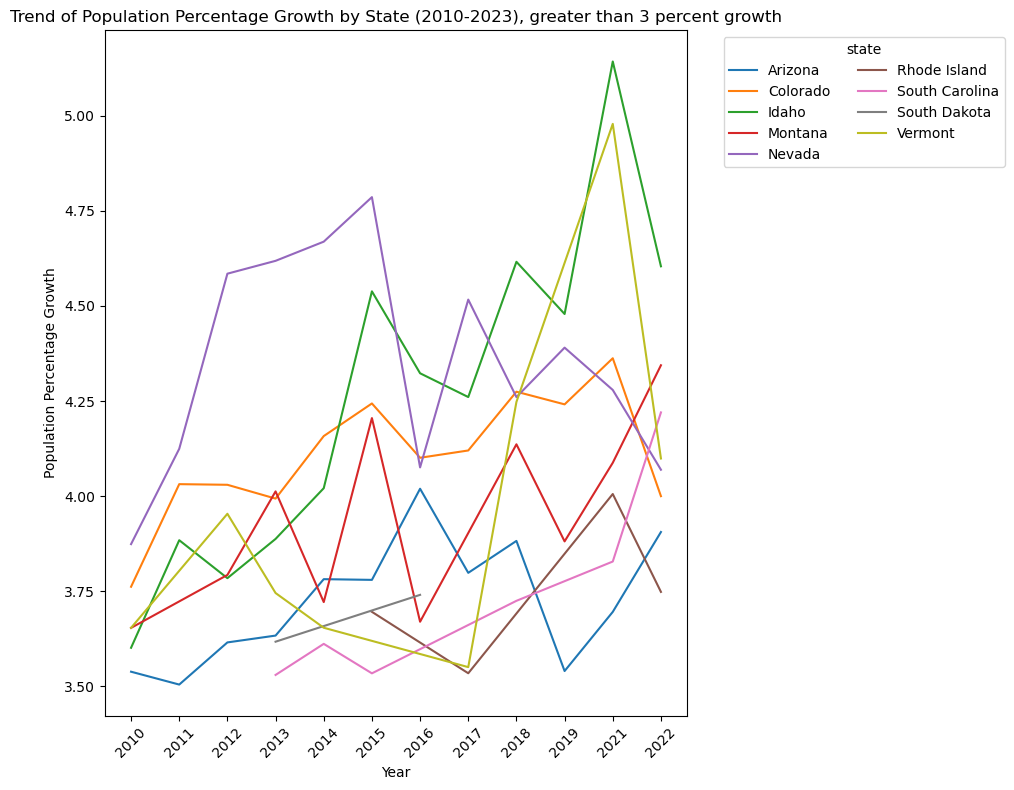

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [87]:
#focus in on states that had growth that were less than 15% growth. 

filtered_years_prct_more_than_3 = filtered_years_df_10_23[(filtered_years_df_10_23['percentage'] > 3.5)]


plt.figure(figsize=(10, 8))

for state in filtered_years_prct_more_than_3['state'].unique():
    state_data = filtered_years_prct_more_than_3[filtered_years_prct_more_than_3['state'] == state]
    if state_data['percentage'].values[-1] > state_data['percentage'].values[0]:
        plt.plot(state_data['year'], state_data['percentage'], label=state)

plt.title('Trend of Population Percentage Growth by State (2010-2023), greater than 3 percent growth')
plt.xlabel('Year')
plt.ylabel('Population Percentage Growth')
plt.legend(title='state', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)  # Adjust legend placement to avoid overlap
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()  # Show the plot
plt.figure(figsize=(10, 8))



This shows that there have been increasing growth in population in Idaho, Montana and Vermont, but dropped post pandemic. 

In [88]:
idaho_weather = merged_df[(merged_df['state'] == 'Idaho')]
idaho_weather = idaho_weather[(idaho_weather['year'].between('2010', '2023'))]
idaho_weather.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
192  Idaho  2010         2.033333             91.1             18.2   
193  Idaho  2011         1.494167             93.5              9.5   
194  Idaho  2012         1.450000             96.9             18.6   
195  Idaho  2013         1.472500             97.6              4.1   
196  Idaho  2014         1.814167             96.3             19.2   

     yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
192        50.150000         1.102500             0.19             2.13   
193        49.085000         0.942500             0.16             2.57   
194        52.296667         1.004167             0.15             2.11   
195        49.757500         0.624167             0.13             1.37   
196        51.902500         1.091667             0.20             1.87   

     avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
192         0.114286  ...             18.2        60.052857           36.286   
193         0.118571  ...              9.5        60.160000           33.580   
194         0.142857  ...             18.6        62.652857           37.798   
195         0.147143  ...              4.1        62.261429           32.252   
196         0.157143  ...             19.2        62.792857           36.656   

     avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
192         0.995714            1.252    1544766       1489128    3.601711   
193         0.925714            0.966    1553300       1492964    3.884375   
194         0.698571            1.432    1566409       1507126    3.784644   
195         0.651429            0.586    1584245       1522653    3.887783   
196         0.817143            1.476    1607377       1542744    4.021023   

      top1  top1 state  
192  10876  Washington  
193   9021  California  
194  10398  Washington  
195  10059  Washington  
196  11461  Washington  

[5 rows x 24 columns]

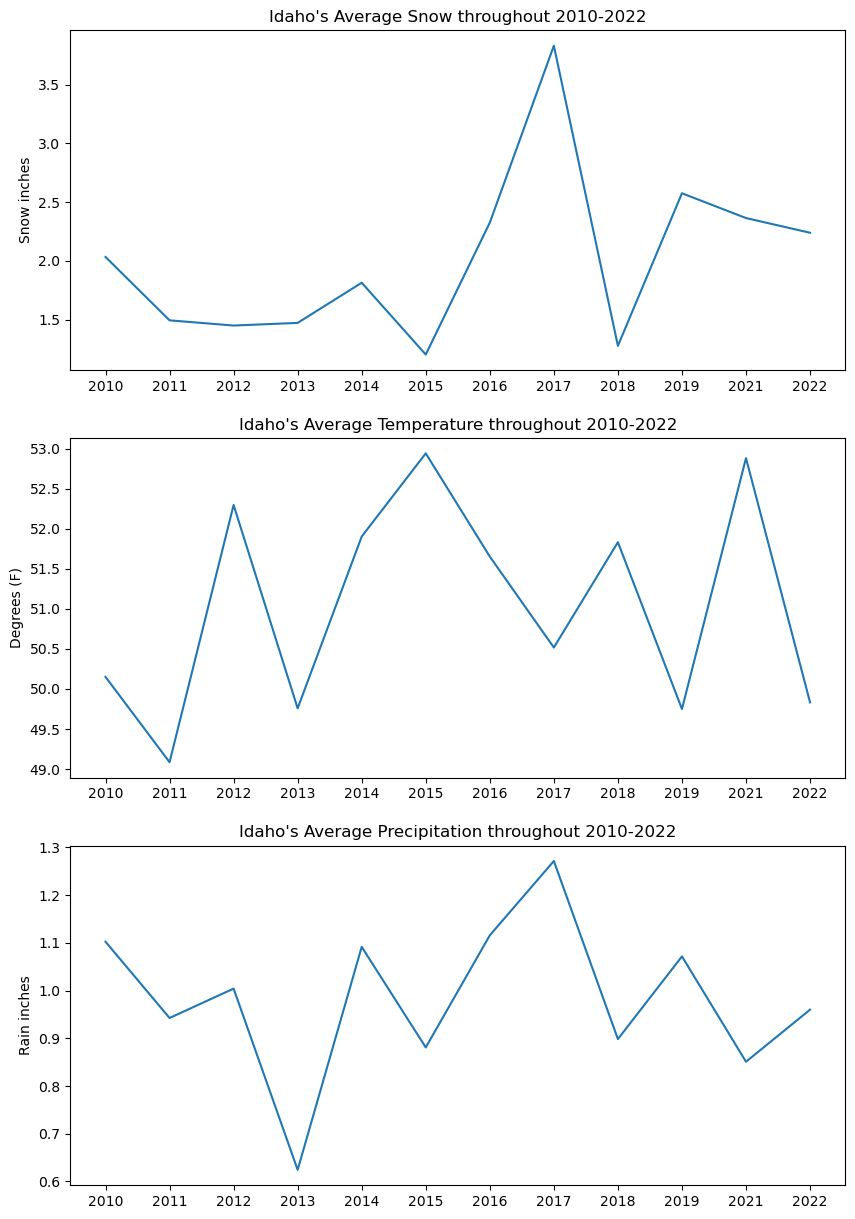

In [89]:
fig, axs = plt.subplots(3,1, figsize=(10, 15))

# First subplot
axs[0].plot(idaho_weather['year'], idaho_weather['yearly_avg_snow'], label='Yearly average snow')
axs[0].set_title("Idaho's Average Snow throughout 2010-2022")
axs[0].set_ylabel('Snow inches')

# Second subplot
axs[1].plot(idaho_weather['year'], idaho_weather['yearly_avg_temp'], label='Yearly average temperature')
axs[1].set_title("Idaho's Average Temperature throughout 2010-2022")
axs[1].set_ylabel('Degrees (F)')

# Third subplot
axs[2].plot(idaho_weather['year'], idaho_weather['yearly_avg_prcp'], label='Yearly average precipitation')
axs[2].set_title("Idaho's Average Precipitation throughout 2010-2022")
axs[2].set_ylabel('Rain inches')


# Show plot
plt.show()

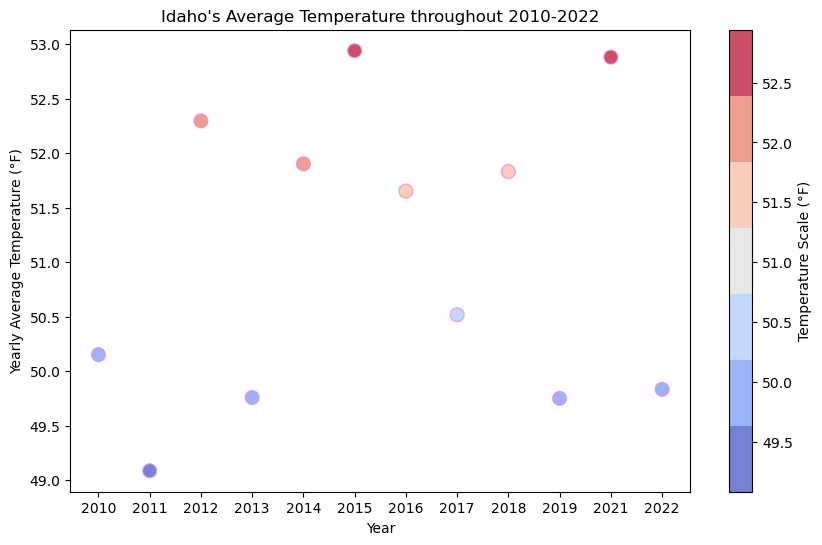

In [190]:
cmap = plt.get_cmap('coolwarm', int((idaho_weather['yearly_avg_temp'].max() - idaho_weather['yearly_avg_temp'].min()) / 0.5))

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(idaho_weather['year'], idaho_weather['yearly_avg_temp'], s=100, alpha=0.7, c=idaho_weather['yearly_avg_temp'], cmap=cmap, edgecolors='violet', linewidth=1)
plt.colorbar(label='Temperature Scale (°F)')
plt.title("Idaho's Average Temperature throughout 2010-2022")
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature (°F)')
plt.show()

In [90]:
vermont_weather = merged_df[(merged_df['state'] == 'Idaho')]
vermont_weather = vermont_weather[(vermont_weather['year'].between('2010', '2023'))]
vermont_weather.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
192  Idaho  2010         2.033333             91.1             18.2   
193  Idaho  2011         1.494167             93.5              9.5   
194  Idaho  2012         1.450000             96.9             18.6   
195  Idaho  2013         1.472500             97.6              4.1   
196  Idaho  2014         1.814167             96.3             19.2   

     yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
192        50.150000         1.102500             0.19             2.13   
193        49.085000         0.942500             0.16             2.57   
194        52.296667         1.004167             0.15             2.11   
195        49.757500         0.624167             0.13             1.37   
196        51.902500         1.091667             0.20             1.87   

     avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
192         0.114286  ...             18.2        60.052857           36.286   
193         0.118571  ...              9.5        60.160000           33.580   
194         0.142857  ...             18.6        62.652857           37.798   
195         0.147143  ...              4.1        62.261429           32.252   
196         0.157143  ...             19.2        62.792857           36.656   

     avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
192         0.995714            1.252    1544766       1489128    3.601711   
193         0.925714            0.966    1553300       1492964    3.884375   
194         0.698571            1.432    1566409       1507126    3.784644   
195         0.651429            0.586    1584245       1522653    3.887783   
196         0.817143            1.476    1607377       1542744    4.021023   

      top1  top1 state  
192  10876  Washington  
193   9021  California  
194  10398  Washington  
195  10059  Washington  
196  11461  Washington  

[5 rows x 24 columns]

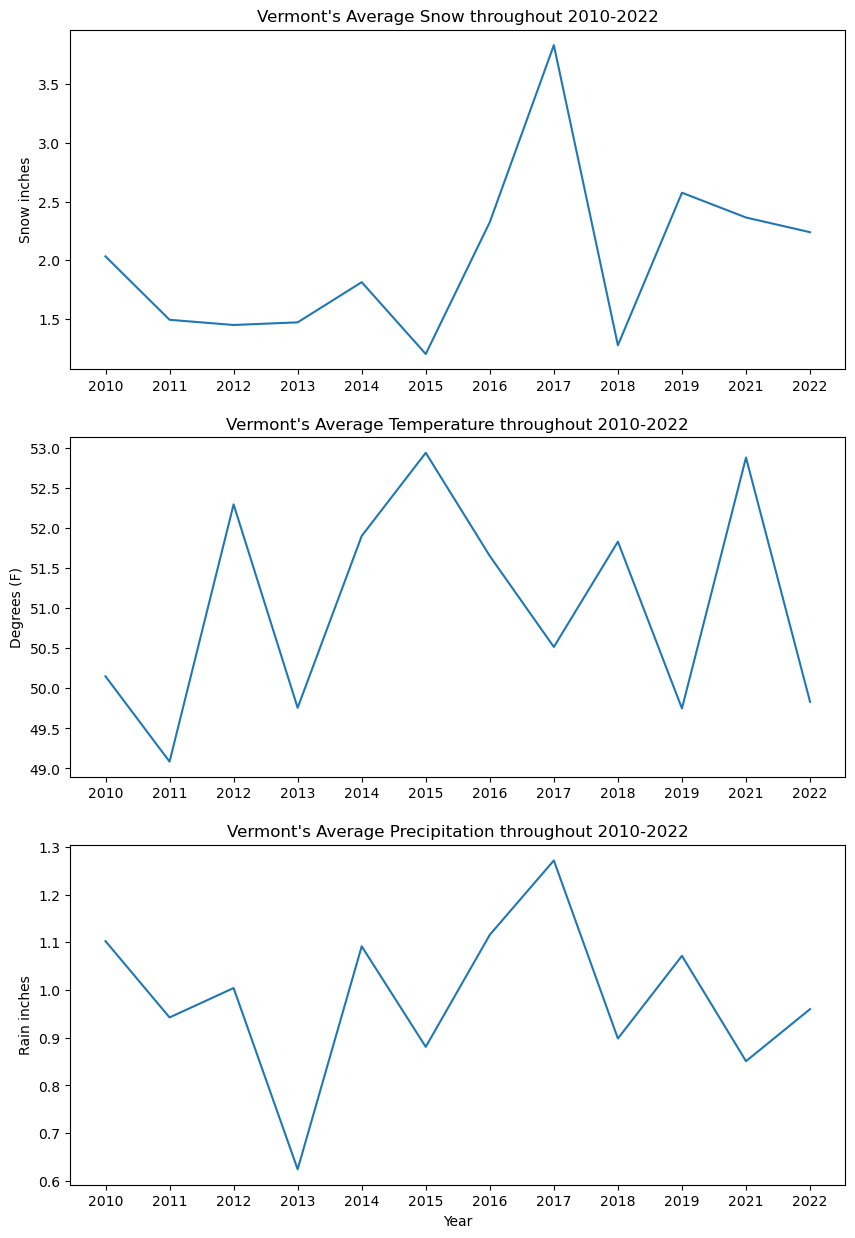

In [91]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# First subplot
axs[0].plot(vermont_weather['year'], vermont_weather['yearly_avg_snow'], label='Yearly average snow')
axs[0].set_title("Vermont's Average Snow throughout 2010-2022")
axs[0].set_ylabel('Snow inches')

# Second subplot
axs[1].plot(vermont_weather['year'], vermont_weather['yearly_avg_temp'], label='Yearly average temperature')
axs[1].set_title("Vermont's Average Temperature throughout 2010-2022")
axs[1].set_ylabel('Degrees (F)')

# Third subplot
axs[2].plot(vermont_weather['year'], vermont_weather['yearly_avg_prcp'], label='Yearly average precipitation')
axs[2].set_title("Vermont's Average Precipitation throughout 2010-2022")
axs[2].set_ylabel('Rain inches')
axs[2].set_xlabel('Year')

# Show plot
plt.show()

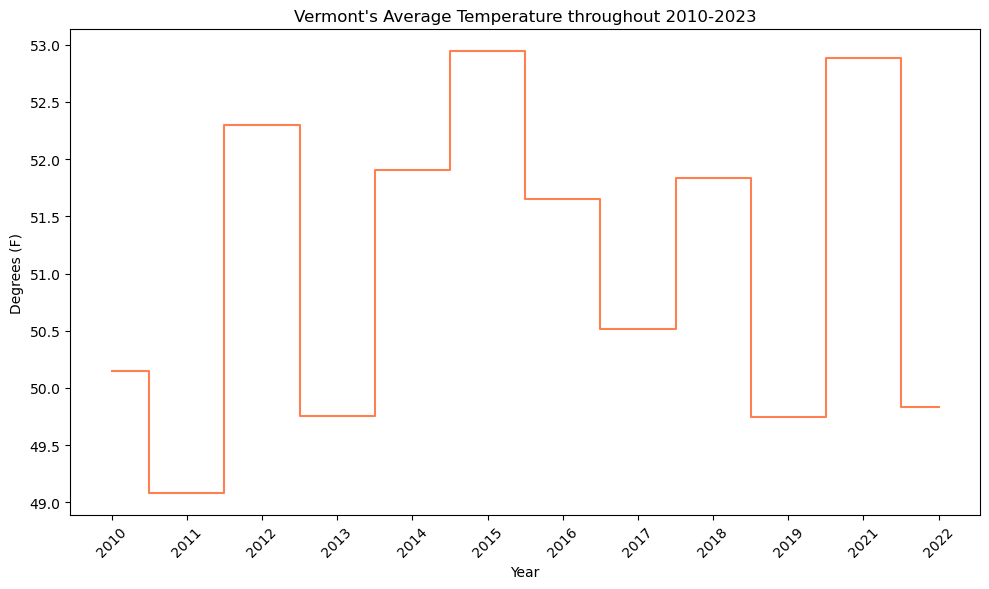

In [207]:
plt.figure(figsize=(10, 6))
plt.step(vermont_weather['year'], vermont_weather['yearly_avg_temp'], label='Yearly average temperature', where='mid', color='coral')

# Set plot title and labels
plt.title("Vermont's Average Temperature throughout 2010-2023")
plt.ylabel('Degrees (F)')
plt.xlabel('Year')
plt.xticks(rotation=45)


# Show the plot
plt.tight_layout()
plt.show()

In [92]:
states_moved_from = merged_df.groupby(['year', 'top1 state']).size().reset_index(name='counts')
pivot_table = states_moved_from.pivot(index='year', columns='top1 state', values='counts').fillna(0)

states_moved_from.head()


year  top1 state  counts
0  2005  California      11
1  2005    Colorado       1
2  2005     Florida       5
3  2005     Georgia       1
4  2005    Illinois       3

In [93]:
sorted_df = states_moved_from.sort_values(by=['year', 'counts'], ascending=[True, False])

sorted_df.head()


year  top1 state  counts
0   2005  California      11
13  2005    New York       6
2   2005     Florida       5
16  2005       Texas       5
4   2005    Illinois       3

In [94]:
top_states_moved_from = states_moved_from[(states_moved_from['counts'] > 4)]
top_states_moved_from.head()

year  top1 state  counts
0   2005  California      11
2   2005     Florida       5
13  2005    New York       6
16  2005       Texas       5
20  2006  California       8

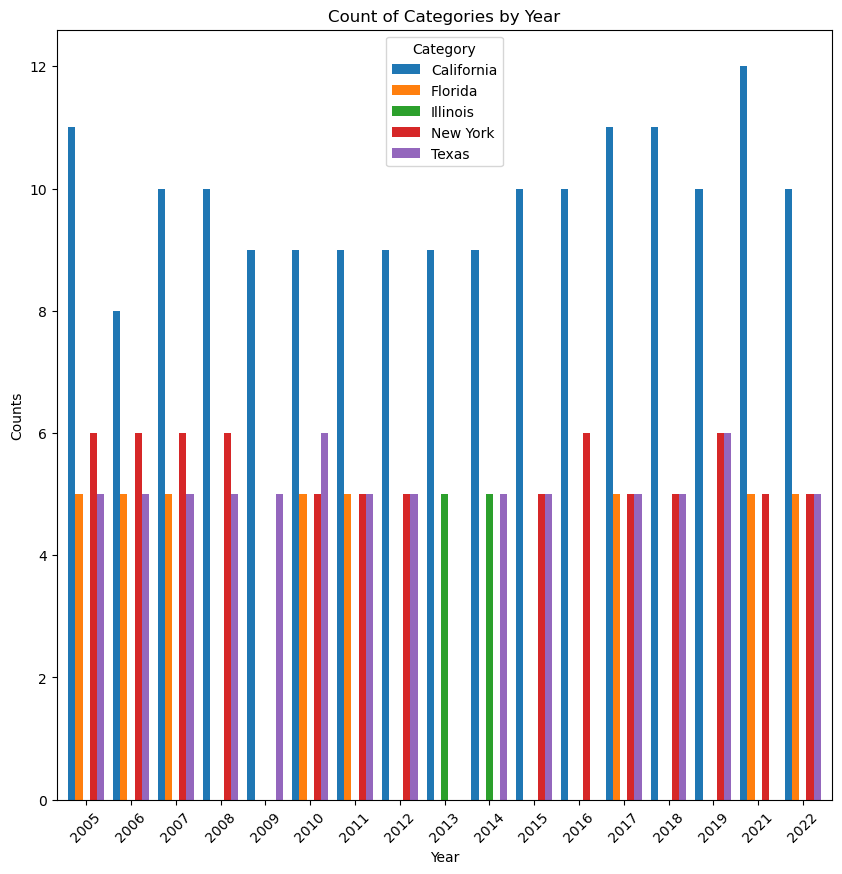

In [95]:
pivot_table = top_states_moved_from.pivot(index='year', columns='top1 state', values='counts').fillna(0)

pivot_table.plot(kind='bar', width=0.8, figsize=(10, 10))
plt.title('Count of Categories by Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


California is the state that people move most often from. 

In [96]:
merged_df.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
0  Alaska  2005         6.230833             73.5            -22.7   
1  Alaska  2006         7.095000             70.1            -29.7   
2  Alaska  2007         6.613333             75.1            -25.8   
3  Alaska  2008         8.601667             70.2            -23.0   
4  Alaska  2009         8.861667             78.6            -24.4   

   yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
0        35.053333         3.210000             1.59             6.21   
1        32.066667         2.837500             0.99             5.69   
2        33.525833         2.635000             0.76             5.82   
3        31.105833         2.935833             2.04             5.32   
4        32.727500         2.755833             1.28             4.56   

   avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
0         1.460000  ...            -22.7        46.864286           18.518   
1         2.138571  ...            -29.7        45.245714           13.616   
2         1.244286  ...            -25.8        46.288571           15.658   
3         3.332857  ...            -23.0        43.210000           14.160   
4         1.438571  ...            -24.4        45.860000           14.342   

   avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
0         3.174286            3.260     115525         84150   27.158624   
1         3.522857            1.878     139758        102086   26.955165   
2         2.912857            2.246     135095         98512   27.079463   
3         3.408571            2.274     150412        110205   26.731245   
4         2.674286            2.870     147525        107051   27.435350   

   top1  top1 state  
0  5711  Washington  
1  4850  Washington  
2  3985  California  
3  4951  California  
4  3780  California  

[5 rows x 24 columns]

In [97]:
cali_weather = merged_df[(merged_df['state'] == 'California')]
cali_weather.head()

state  year  yearly_avg_snow  yearly_max_temp  yearly_min_temp  \
68  California  2005         0.697500            114.3             15.7   
69  California  2006         0.385000            112.8             16.3   
70  California  2007         0.023333            110.6             11.3   
71  California  2008         0.145833            109.7             13.1   
72  California  2009         0.041667            111.8             14.3   

    yearly_avg_temp  yearly_avg_prcp  yearly_min_prcp  yearly_max_prcp  \
68        61.175833         1.854167             0.01             5.90   
69        61.183333         1.321667             0.03             4.25   
70        61.233333         0.771667             0.02             3.12   
71        61.374167         1.027500             0.00             5.85   
72        61.285833         1.060000             0.02             4.14   

    avg_snow_summer  ...  min_temp_winter  avg_temp_summer  avg_temp_winter  \
68              0.0  ...             15.7        67.357143           52.522   
69              0.0  ...             16.3        68.648571           50.732   
70              0.0  ...             11.3        68.201429           51.478   
71              0.0  ...             13.1        68.792857           50.988   
72              0.0  ...             14.3        68.554286           51.110   

    avg_prcp_summer  avg_prcp_winter  total pop  in-state pop  percentage  \
68         0.557143            3.670    5353798       4904586    8.390529   
69         0.572857            2.370    5698358       5173950    9.202791   
70         0.378571            1.322    5311592       4819935    9.256302   
71         0.112857            2.308    5303579       4834704    8.840728   
72         0.520000            1.816    5698601       5238440    8.074982   

     top1  top1 state  
68  36030       Texas  
69  49027       Texas  
70  36391       Texas  
71  42142       Texas  
72  35104       Texas  

[5 rows x 24 columns]

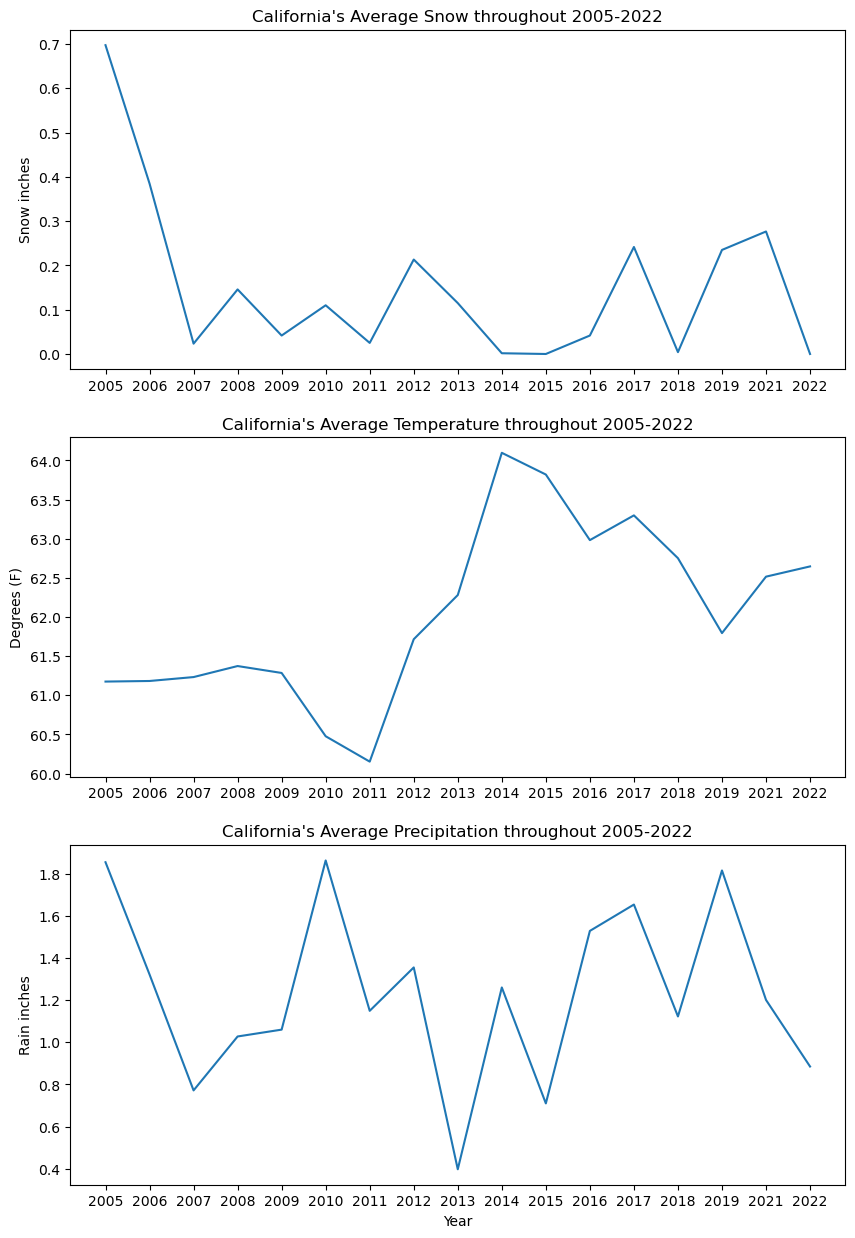

In [98]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# First subplot
axs[0].plot(cali_weather['year'], cali_weather['yearly_avg_snow'], label='Yearly average snow')
axs[0].set_title("California's Average Snow throughout 2005-2022")
axs[0].set_ylabel('Snow inches')

# Second subplot
axs[1].plot(cali_weather['year'], cali_weather['yearly_avg_temp'], label='Yearly average temperature')
axs[1].set_title("California's Average Temperature throughout 2005-2022")
axs[1].set_ylabel('Degrees (F)')

# Third subplot
axs[2].plot(cali_weather['year'], cali_weather['yearly_avg_prcp'], label='Yearly average precipitation')
axs[2].set_title("California's Average Precipitation throughout 2005-2022")
axs[2].set_ylabel('Rain inches')
axs[2].set_xlabel('Year')

# Show plot
plt.show()

In [128]:
# move year column to second column
cols = ['state', 'year'] + [col for col in merged_df.columns if col not in ['state', 'year']]
merged_df = merged_df[cols]

# Group the data by 'year' and calculate the average temperature across all states for each year
avg_temp_by_year = merged_df.groupby('year')[['yearly_avg_temp']].mean()

# Calculate the overall average temperature by taking the mean of the three temperature columns
avg_temp_by_year['overall_avg_temp'] = avg_temp_by_year.mean(axis=1)

In [129]:
avg_temp_by_year.head()

yearly_avg_temp  overall_avg_temp
year                                   
2005        54.424983         54.424983
2006        55.220051         55.220051
2007        54.585000         54.585000
2008        53.409456         53.409456
2009        53.310714         53.310714

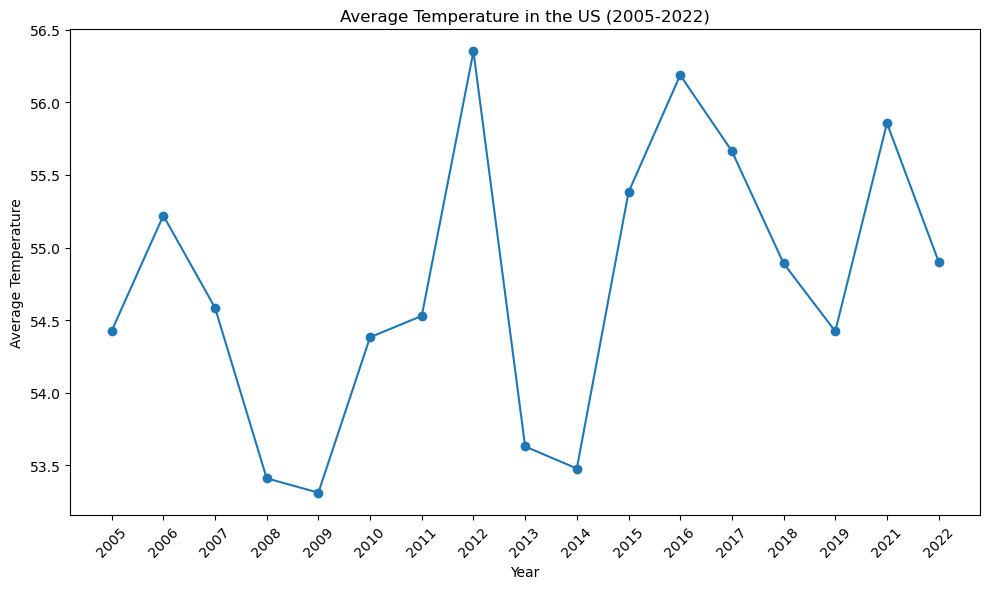

In [130]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_year.index, avg_temp_by_year['overall_avg_temp'], marker='o', linestyle='-')
plt.title('Average Temperature in the US (2005-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(avg_temp_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

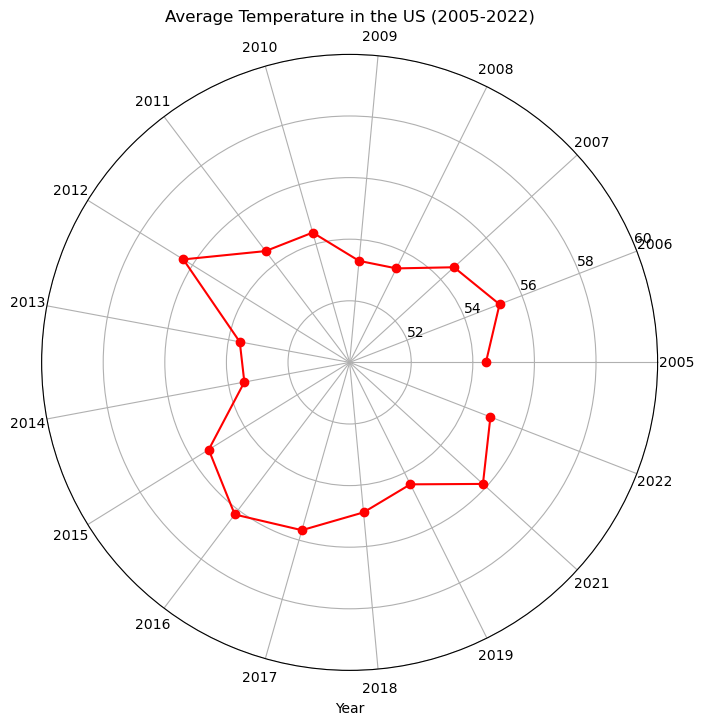

In [165]:
import numpy as np

years = avg_temp_by_year.index
avg_temp = avg_temp_by_year['overall_avg_temp']

# Convert years to radians for polar plot
theta = np.linspace(0, 2*np.pi, len(years), endpoint=False)

# Plotting
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, avg_temp, marker='o', linestyle='-', color='red')

# Customize the plot
ax.set_title('Average Temperature in the US (2005-2022)')
ax.set_xlabel('Year')
# ax.set_ylabel('Average Temperature')
ax.set_xticks(theta)
ax.set_xticklabels(years, rotation=45)
ax.set_ylim(50, 60)

plt.show()

In [144]:
# move year column to second column
cols = ['state', 'year'] + [col for col in merged_df.columns if col not in ['state', 'year']]
merged_df = merged_df[cols]

# Group the data by 'year' and calculate the average temperature across all states for each year
avg_prcp_by_year = merged_df.groupby('year')[['yearly_avg_prcp']].mean()

# Calculate the overall average temperature by taking the mean of the three temperature columns
avg_prcp_by_year['overall_avg_prcp'] = avg_prcp_by_year.mean(axis=1)

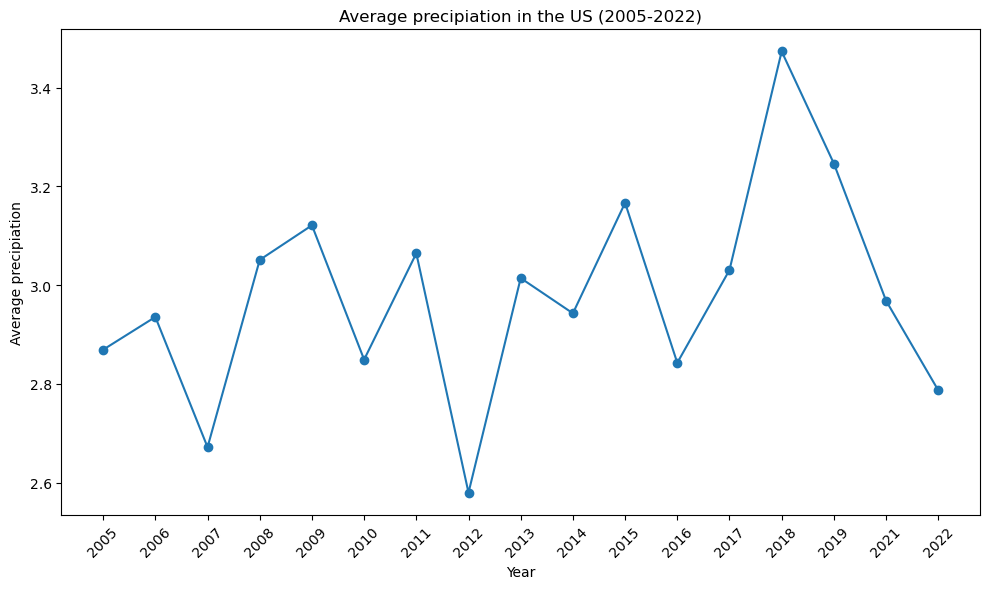

In [145]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(avg_prcp_by_year.index, avg_prcp_by_year['overall_avg_prcp'], marker='o', linestyle='-')
plt.title('Average precipiation in the US (2005-2022)')
plt.xlabel('Year')
plt.ylabel('Average precipiation')
plt.xticks(avg_temp_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

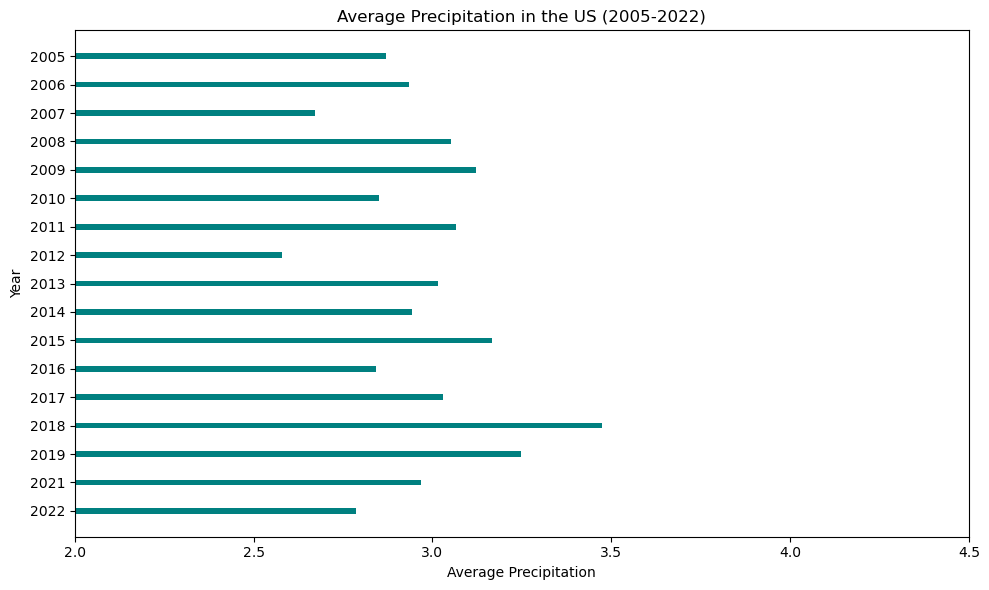

In [149]:
plt.figure(figsize=(10, 6))
plt.barh(avg_prcp_by_year.index, avg_prcp_by_year['overall_avg_prcp'], color='teal', height=0.2)
plt.title('Average Precipitation in the US (2005-2022)')
plt.xlabel('Average Precipitation')
plt.ylabel('Year')
plt.gca().invert_yaxis()  # Invert y-axis to have the latest year at the top
plt.yticks(avg_prcp_by_year.index)  # Set y-ticks to be the years
plt.xlim(2, 4.5)  # Limit x-axis values
plt.tight_layout()
plt.show()

In [154]:
# move year column to second column
cols = ['state', 'year'] + [col for col in merged_df.columns if col not in ['state', 'year']]
merged_df = merged_df[cols]

# Group the data by 'year' and calculate the average temperature across all states for each year
avg_snow_by_year = merged_df.groupby('year')[['yearly_avg_snow']].mean()

# Calculate the overall average temperature by taking the mean of the three temperature columns
avg_snow_by_year['overall_avg_snow'] = avg_snow_by_year.mean(axis=1)

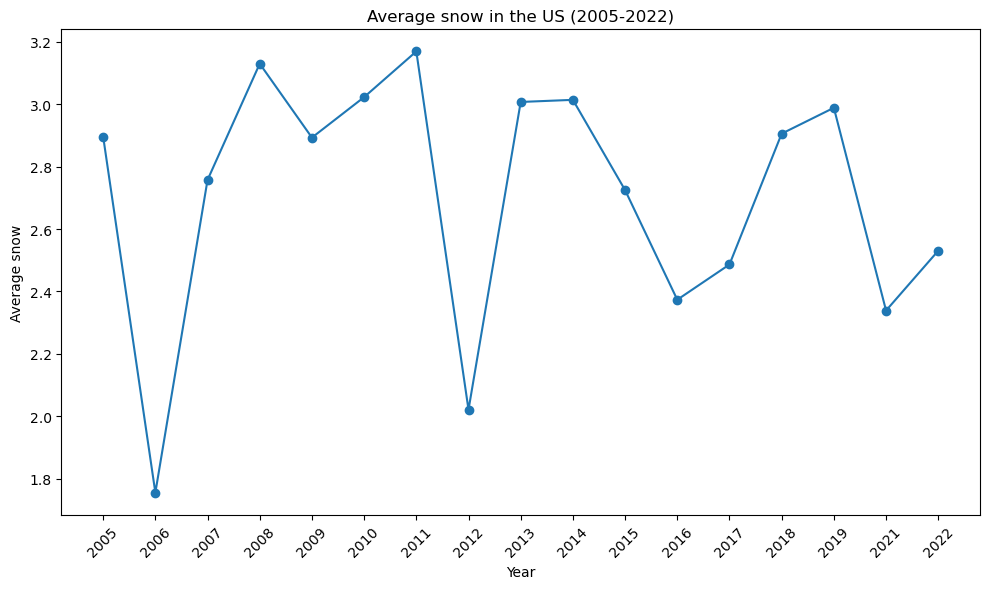

In [155]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(avg_snow_by_year.index, avg_snow_by_year['overall_avg_snow'], marker='o', linestyle='-')
plt.title('Average snow in the US (2005-2022)')
plt.xlabel('Year')
plt.ylabel('Average snow')
plt.xticks(avg_temp_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

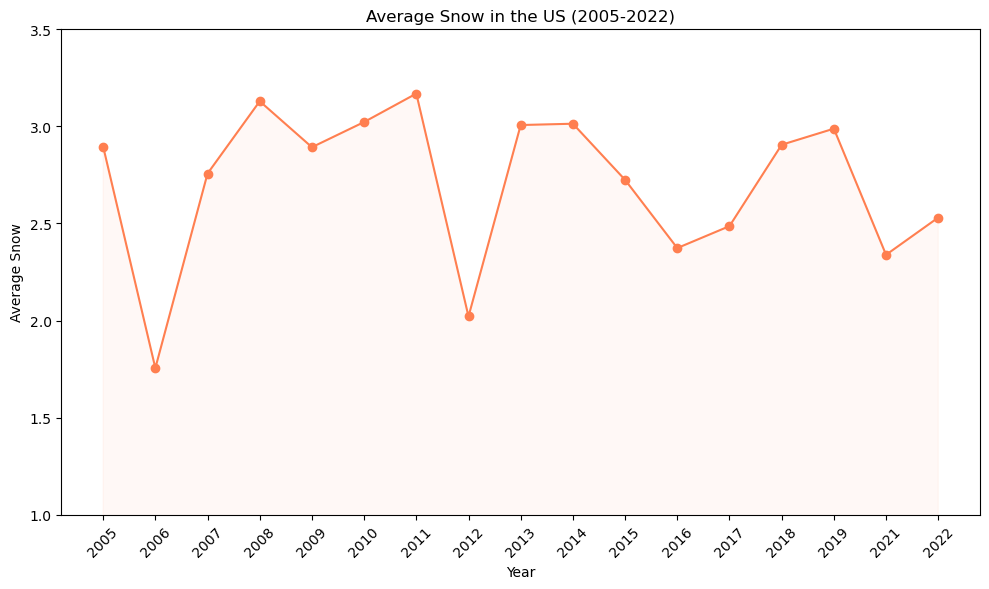

In [162]:
plt.figure(figsize=(10, 6))
plt.fill_between(avg_snow_by_year.index, avg_snow_by_year['overall_avg_snow'], color='coral', alpha=0.05)
plt.plot(avg_snow_by_year.index, avg_snow_by_year['overall_avg_snow'], marker='o', color='coral', linestyle='-')
plt.title('Average Snow in the US (2005-2022)')
plt.xlabel('Year')
plt.ylabel('Average Snow')
plt.xticks(avg_snow_by_year.index, rotation=45)
plt.ylim(1, 3.5)  # Set y-axis limits
plt.tight_layout()
plt.show()

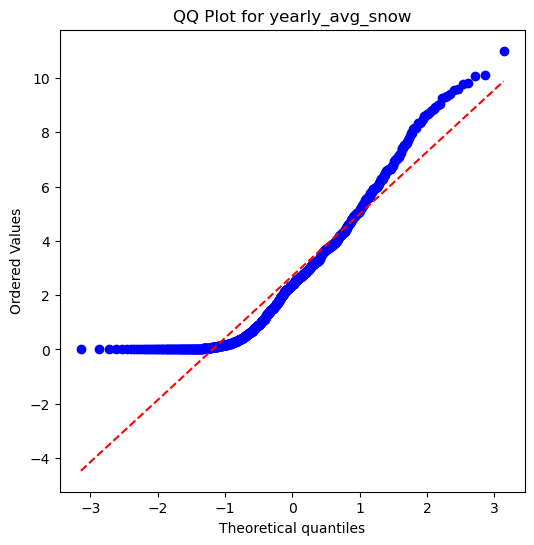

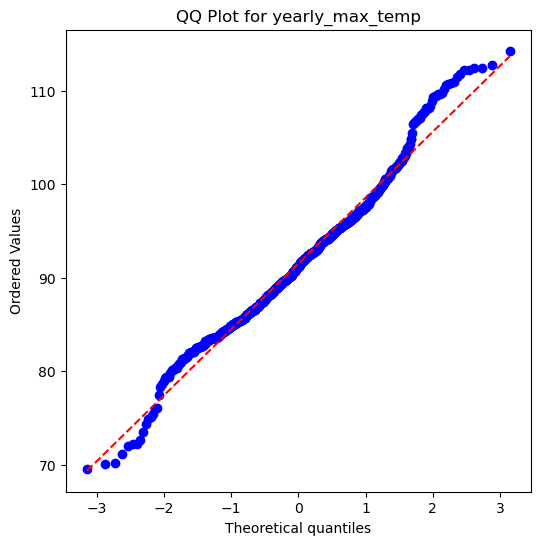

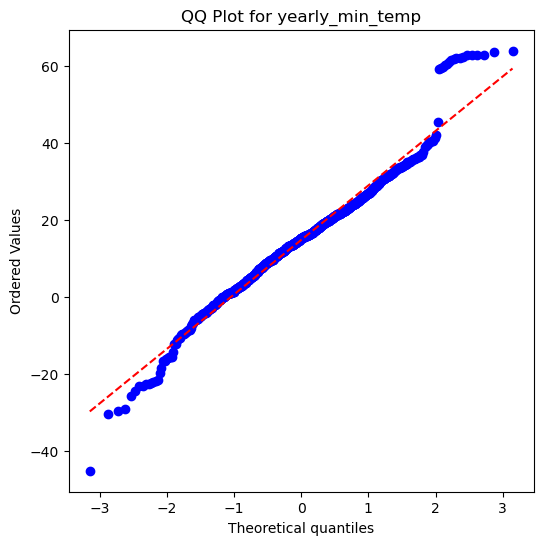

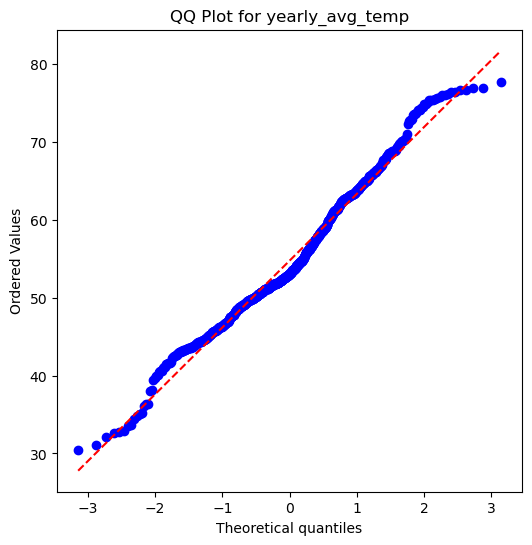

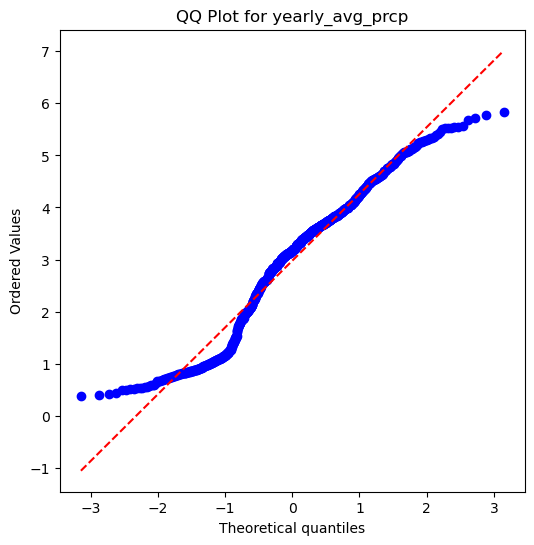

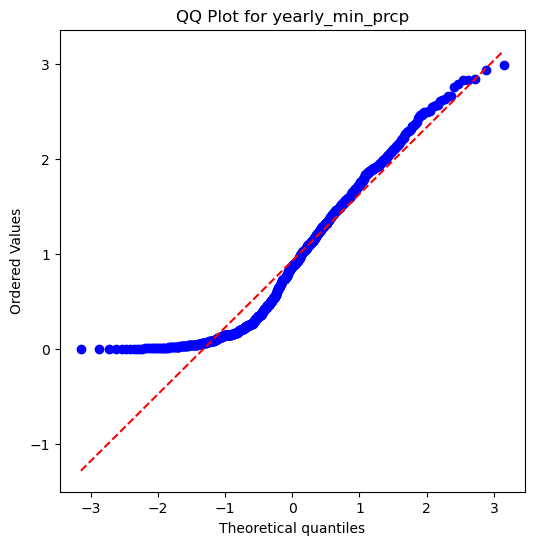

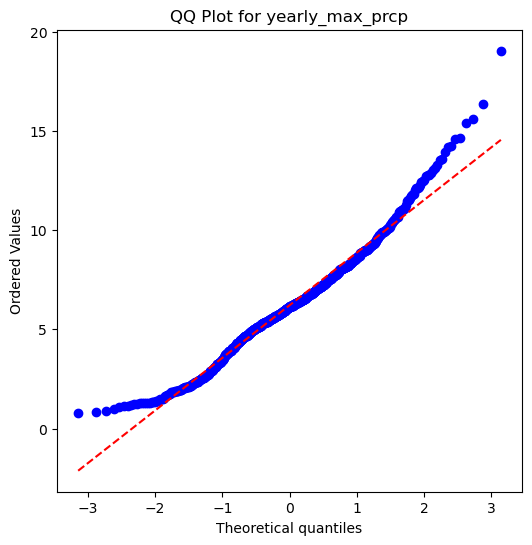

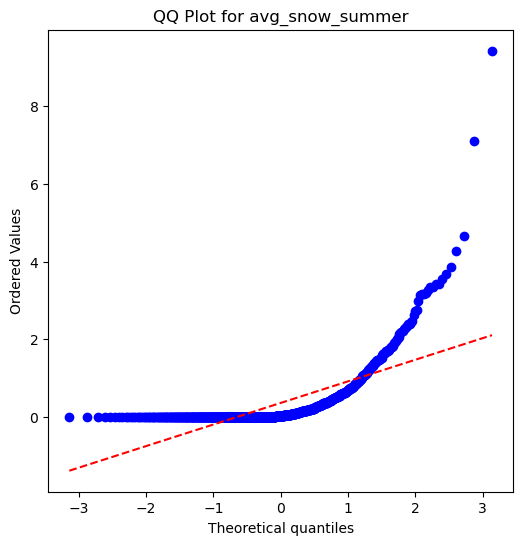

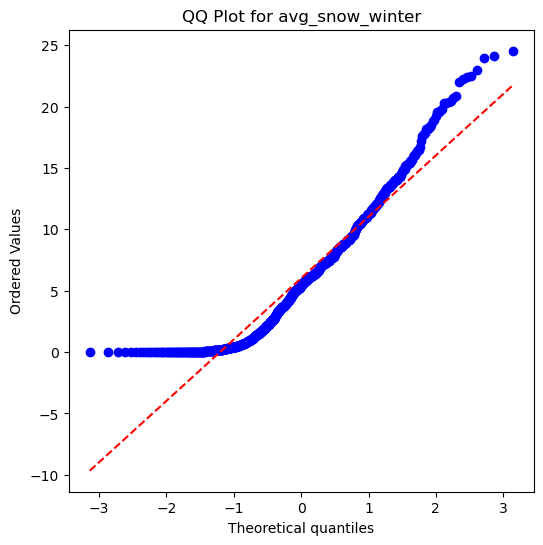

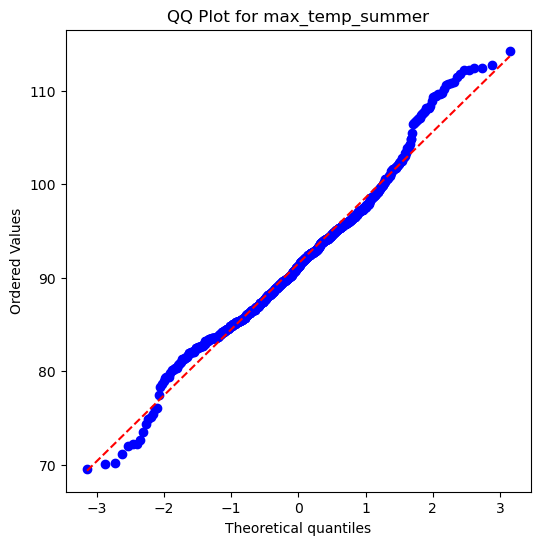

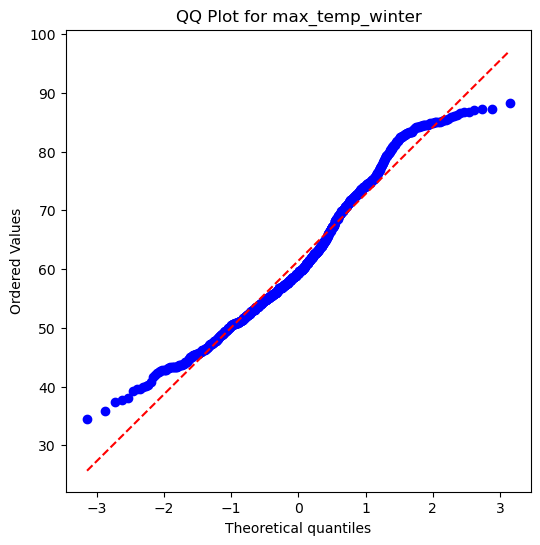

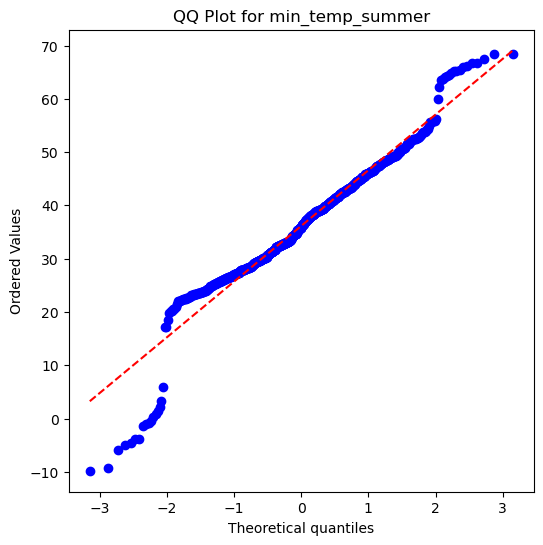

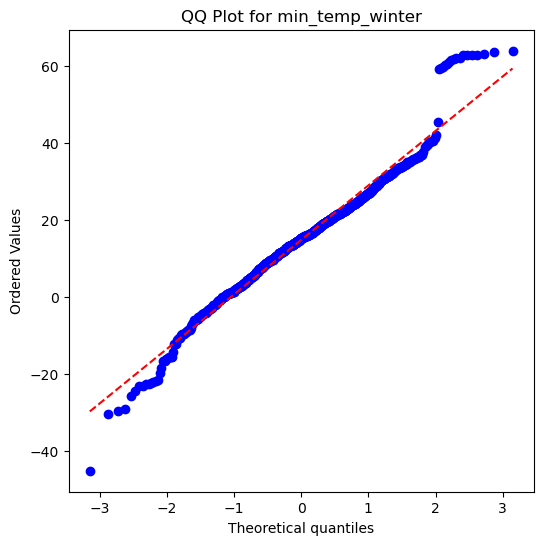

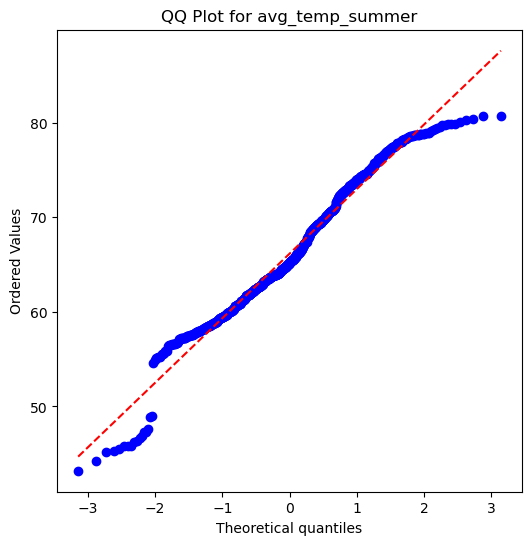

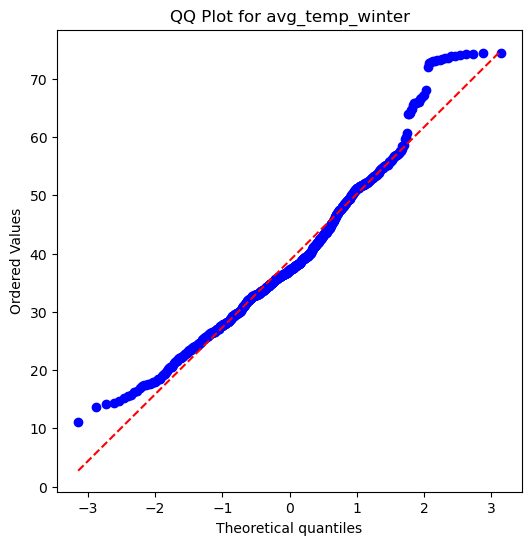

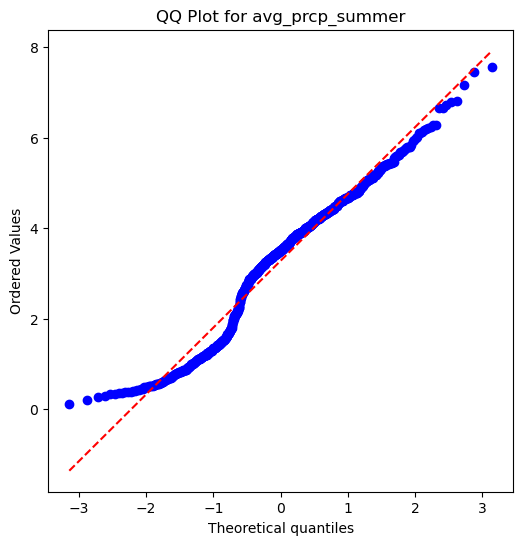

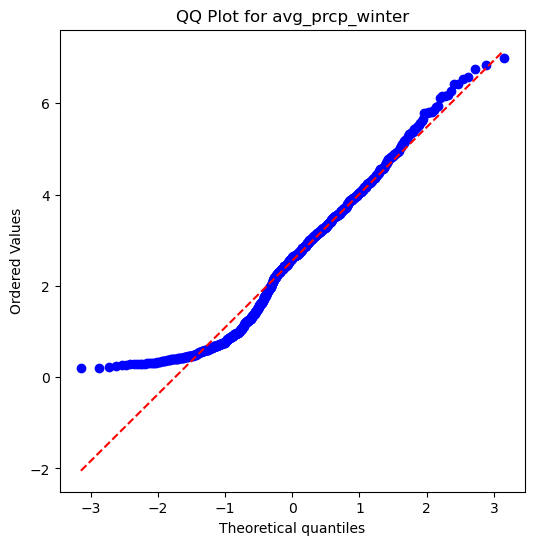

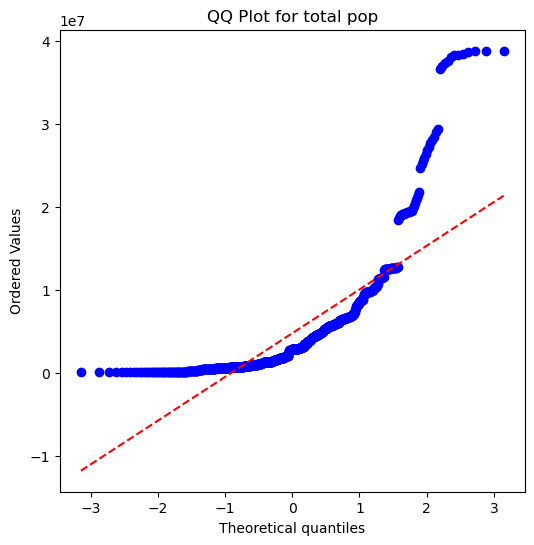

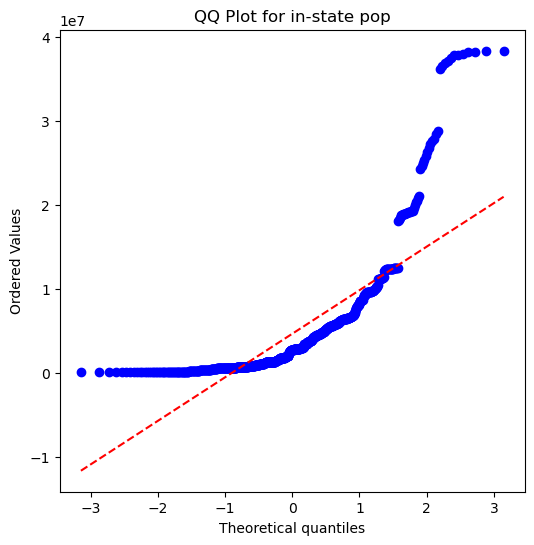

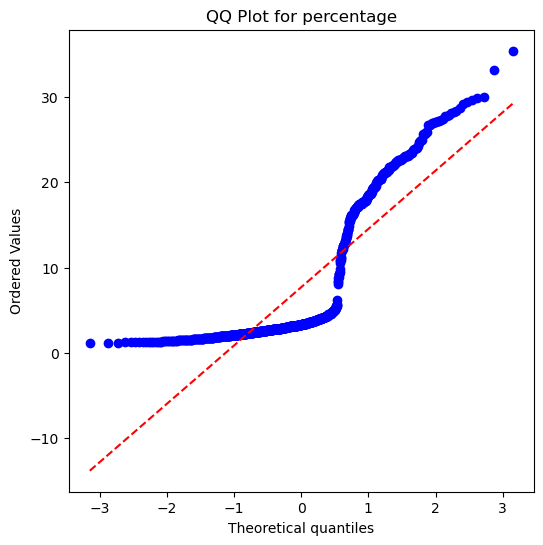

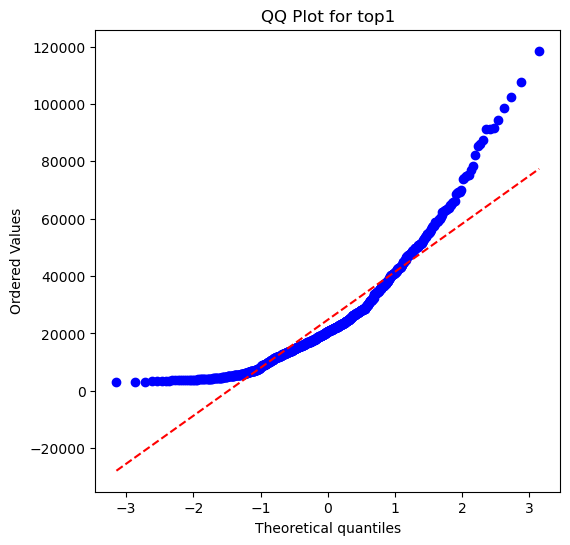

In [107]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Iterate over each column
for column in merged_df.columns:
    # Check if the column contains numeric values
    if pd.api.types.is_numeric_dtype(merged_df[column]):
        # Drop missing or invalid values
        column_data = merged_df[column].dropna()
        
        # Create QQ plot for the current column
        fig, ax = plt.subplots(figsize=(6, 6))
        stats.probplot(column_data, dist="norm", plot=ax)
        ax.get_lines()[1].set_linestyle('--')  # Add a reference line for normal distribution
        ax.set_title(f'QQ Plot for {column}')
        plt.show()

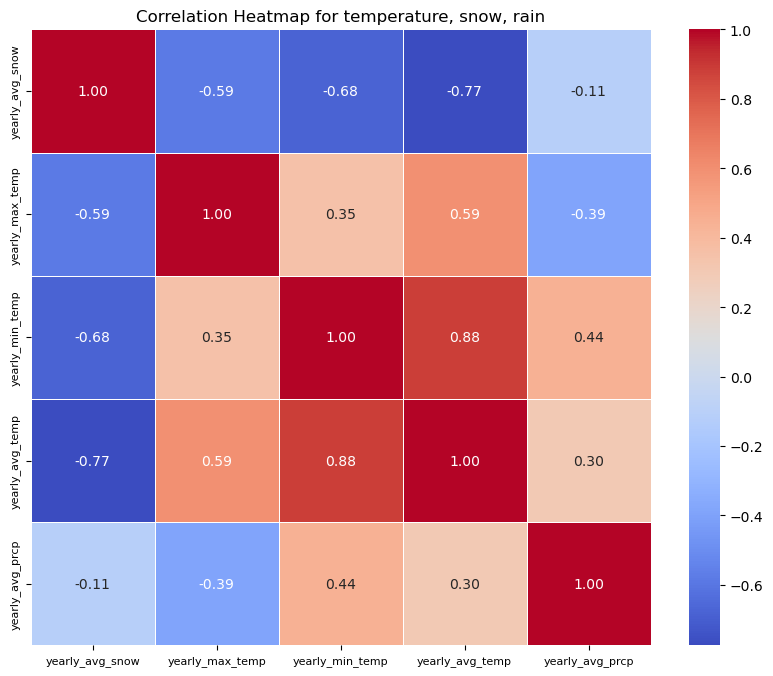

In [171]:
correlation_matrix = merged_df[['yearly_avg_snow', 'yearly_max_temp', 'yearly_min_temp', 'yearly_avg_temp', 'yearly_avg_prcp']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for temperature, snow, rain')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()